## Introduction:
#### Liver is the largest internal organ and the largest gland in the human body. it is situated under the rib cage on right side of abdomen. Liver is essential for digesting food, it metabolizes nutrients, regulates blood sugar level and ridding the body of toxic substances. So it is important to take care of the liver health.
#### Our work on Liver disease patient prediction using machine learning approaches helps to reduce the burden on doctors.

#### The dataset contains 416 liver patient records and 167 non liver patient records. 

## Problem statement:
### Based on the given features predict whether the person will have liver disease or not

## List Of Contents:
   ### 1. Importing Libraries
   ### 2. Data Collection
   ### 3. Domain Analysis
   ### 4. Exploratory Data Analysis
   ### 5. Data Pre Processing
   ### 6. Feature Selection
   ### 7. Model Creation
   ### 8. Model Evaluation
   ### 9. Evaluation Summary
   ### 10. Conclusion

## Importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data collection

In [2]:
## Loading the dataset
data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv', header=None)

In [3]:
## Adding columns name to the dataset
data.rename(columns={0:'Age', 1:'Gender', 2:'Total Bilirubin', 3:'Direct Bilirubin', 4:'ALP', 5:'ALT', 
                     6:'AST', 7:'Total Protien', 8:'Albumin', 9:'A/G Ratio', 10:'Target'}, inplace=True)

In [4]:
# Getting first 5 rows
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,ALP,ALT,AST,Total Protien,Albumin,A/G Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
# Getting last 5 rows
data.tail()

,Age,Gender,Total Bilirubin,Direct Bilirubin,ALP,ALT,AST,Total Protien,Albumin,A/G Ratio,Target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [6]:
## Finding the shape of dataset
data.shape

(583, 11)

#### The dataset has 583 records with 11 features

In [7]:
## Quick summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               583 non-null    int64  
 1   Gender            583 non-null    object 
 2   Total Bilirubin   583 non-null    float64
 3   Direct Bilirubin  583 non-null    float64
 4   ALP               583 non-null    int64  
 5   ALT               583 non-null    int64  
 6   AST               583 non-null    int64  
 7   Total Protien     583 non-null    float64
 8   Albumin           583 non-null    float64
 9   A/G Ratio         579 non-null    float64
 10  Target            583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
## Finding duplicate records
data.duplicated().sum()

13

#### The dataset contains 16 duplicate records, so we are dropping those

In [9]:
## Finding the index location of duplicate records 
data.loc[data.duplicated()==True]

,Age,Gender,Total Bilirubin,Direct Bilirubin,ALP,ALT,AST,Total Protien,Albumin,A/G Ratio,Target
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [10]:
## Dropping duplicate records
data=data.drop_duplicates()

In [11]:
## Shape of the dataset after dropping duplicate records
data.shape

(570, 11)

In [12]:
## Statistical information about numerical data
data.describe()

,Age,Total Bilirubin,Direct Bilirubin,ALP,ALT,AST,Total Protien,Albumin,A/G Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,1.287719
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [13]:
## statistical information about categorical data
data.describe(include='O')

,Gender
count,570
unique,2
top,Male
freq,430


#### The dataset has more number of male records than female records

In [14]:
## Checking for null values
data.isnull().sum()

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
ALP                 0
ALT                 0
AST                 0
Total Protien       0
Albumin             0
A/G Ratio           4
Target              0
dtype: int64

#### The dataset contains 4 null values in A/G ratio coulumn

In [15]:
## Counting the tagert variabe for each class
data.Target.value_counts()

1    406
2    164
Name: Target, dtype: int64

#### Our target column is a binary variable. 1 represents the patient is having liver disease and 2 represents the patient is not having liver disease

#### The dataset is having 406 records of liver disease patients and 164 records of no liver disease patients. It is an highly imbalanced dataset.

## Domain Analysis
 
 1. **Age** - Age of the patient.
 
 
 2. **Gender** - Gender of the patient.
 
 
 3. **Total Bilirubin** - Total bilirubin comprises of both direct and indirect bilirubin.Bilirubin is a yellowish pigment that is formed during the breakdown of red blood cells. Bilirubin passes through the liver and is eventually excreted out of the body. It is an important parameter for assessing liver health and determining if there are any liver disorders or abnormalities present. Normal range should be in between 1.71 to 20.5 µmol/L  as per the article (https://www.mountsinai.org/health-library/tests/bilirubin-blood-test)

 
 
4. **Direct Bilirubin** - Direct bilirubin also known as conjugated bilirubin is a component of total bilirubin found in the bloodstream. It refers to the fraction of bilirubin that has been processed by the liver and conjugated with glucuronic acid, making it water-soluble. This conjugated bilirubin is then transported from the liver to the gallblader and released into the intestine as part of bile, where it plays a role in the digestion and obsorption of fat. Normal range should be less than 5.1 µmol/L for a normal person as per (https://www.mountsinai.org/health-library/tests/bilirubin-blood-test)


5. **ALP** - ALP stands for alkaline phosphatase. It is an enzyme found in many parts of human body. Each part produces different type of ALP. ALP is often measured to assess liver health. In liver, ALP transports bile and the metabolism of certain substances takes place. Normal range is 44 to 147 international units per liter (IU/L) or 0.73 to 2.45 microkatal per liter (µkat/L). as per (https://www.mountsinai.org/health-library/tests/alp-blood-test)


6. **ALT** - ALT stands for alanine aminotransferase. ALT is an enzyme found primarily in liver cells. When the liver cells are damaged or inflamed, ALT is released into bloodstream. The most common cause of increased ALT levels is heptitis, alcohol abuse, fatty liver disease and other liver conditions. The normal range is 4 to 36 U/L.(https://www.mountsinai.org/health-library/tests/alanine-transaminase-alt-blood-test)


7. **AST** - AST stands for aspartate aminotransferase. Like ALT, AST is an enzyme found in various organs of the body. AST in liver, released into bloodstream when the liver is damaged or injured. The normal range is 8 to 33 U/L.(https://www.mountsinai.org/health-library/tests/aspartate-aminotransferase-ast-blood-test)


8. **Total Protien** - Normal range is 6.0 to 8.3 grams per deciliter (g/dL) or 60 to 83 g/L(https://www.mountsinai.org/health-library/tests/total-protein)


9. **Albumin** - Albumin is a protien produced by the liver and is the most abundant protien in the blood plasma. It maintains osmotic pressure, transporting substances such as hormones and drugs, and contributing to the regulation of blood pH. The normal albumin range is 3.4 to 5.4 g/dL. (https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=167&contentid=albumin_blood)


10. **A/G Ratio** - The normal range for albumin/globulin ratio is over 1Trusted Source, usually around 1 to 2. That’s because there’s a bit more albumin than globulin in serum protein.(https://www.healthline.com/health/a-g-ratio-high#results)


11. **Target** - The target column is has binary label, where 1 represts liver disease patient and 2 represents no liver disease patient.

# Exploratory Data Analysis

###  Segregating  numerical columns and Categorical columns

In [16]:
cat_cols=[] # empty list for categorical columns
num_cols=[] # empty list for numerical columns

for i in data.columns:
    if data[i].dtype=='object': # condition to check whether it is object or any other datatype
        cat_cols.append(i)
    else:
        num_cols.append(i)
print('catgorical columns are:- \n', cat_cols, end=' ')
print('\n')
print('numerical columns are:- \n', num_cols, end=' ')

catgorical columns are:- 
 ['Gender'] 

numerical columns are:- 
 ['Age', 'Total Bilirubin', 'Direct Bilirubin', 'ALP', 'ALT', 'AST', 'Total Protien', 'Albumin', 'A/G Ratio', 'Target'] 

In [17]:
num_data=data[num_cols] # defined numerical dataframe using numerical columns
cat_data=data[cat_cols] # defined categorical dataframe using catgorical columns

## Univariate Analysis for numerical data

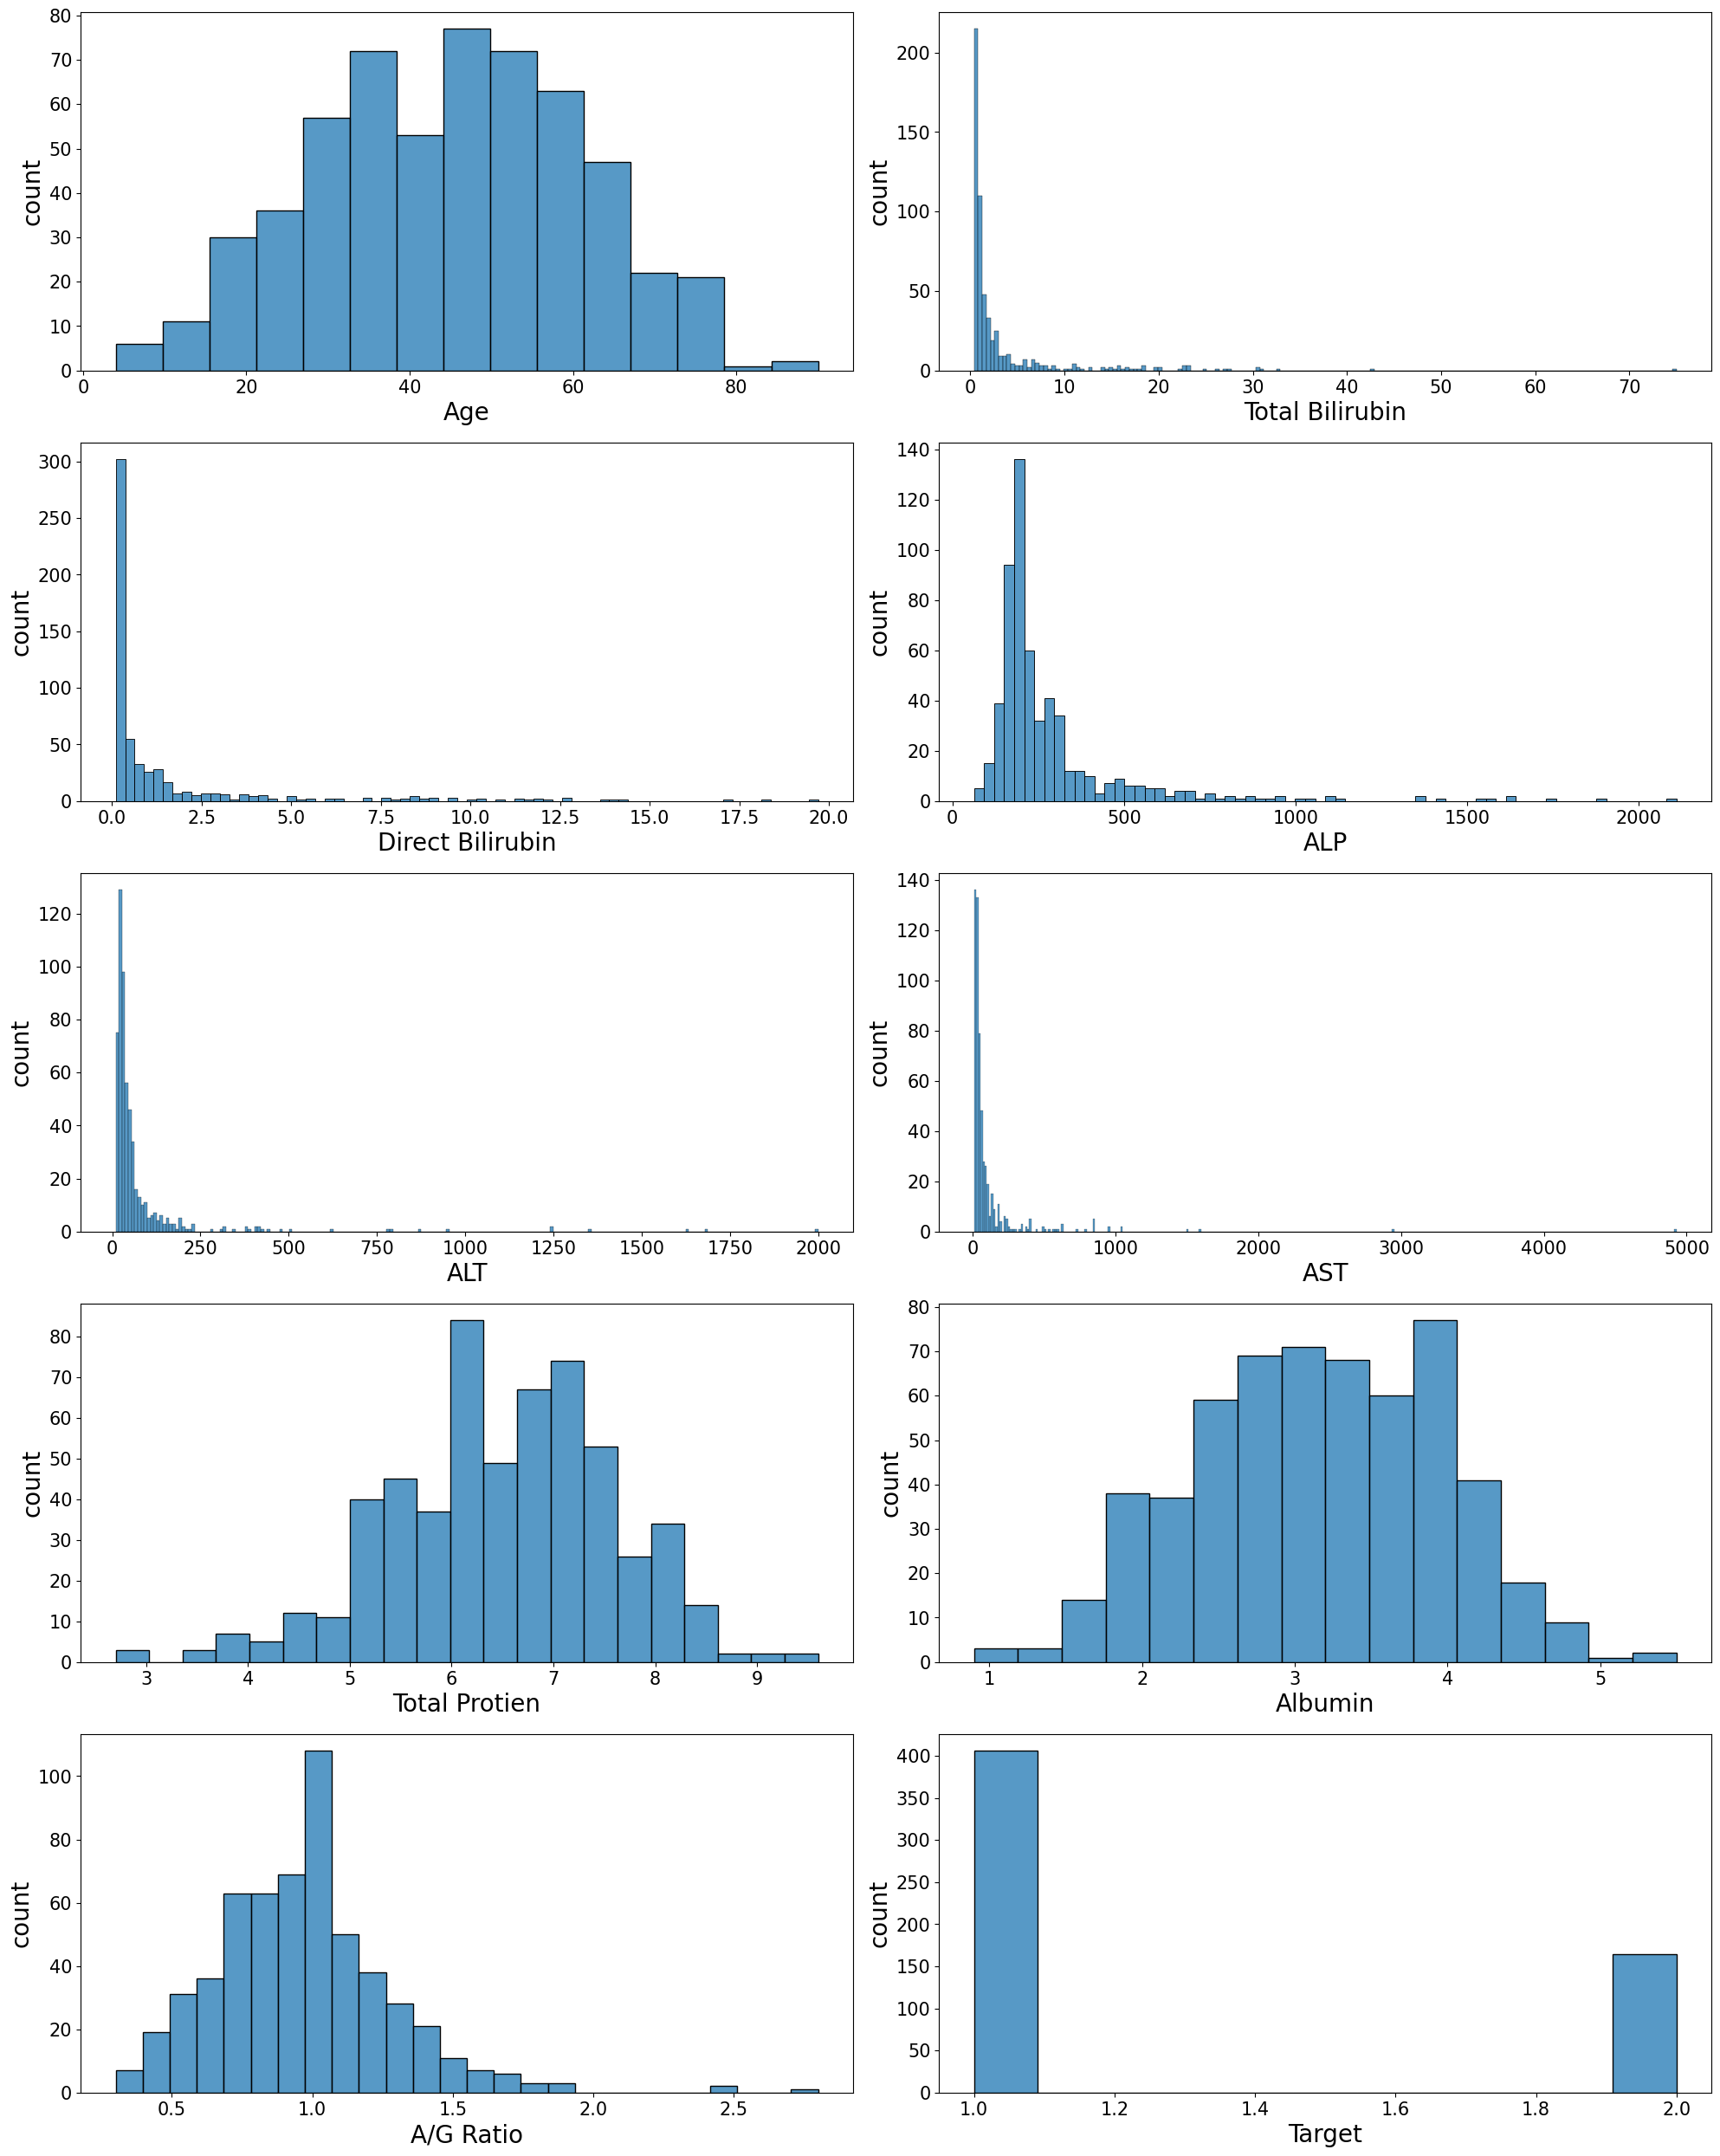

In [18]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for i in num_data:
   
    plt.subplot(5,2,plotnumber) 
    sns.histplot(x=i, data=data)
    plt.xlabel(i,fontsize=20)
    plt.ylabel('count',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plotnumber+=1
    
plt.tight_layout()

## Univariate Analysis for categorical data

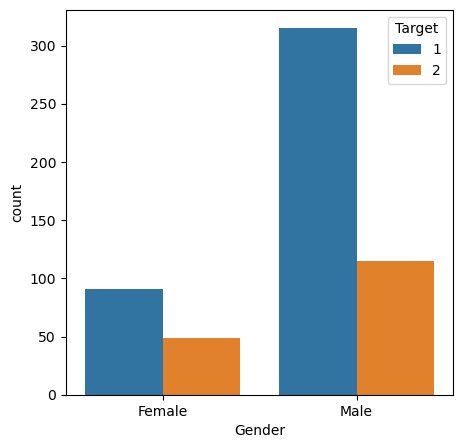

In [19]:
plt.figure(figsize=(5,5), facecolor='white')
sns.countplot(x='Gender', hue='Target', data=data)
plt.show()

## Insights from univariate analysis
#### ● Age - the age column is normally distributed. The minimum age is 4 years and the maximum age is 90 years.

#### ● Gender - most of the liver daigonisis patients are male and male are more prone to liver disease as copmared to female.

#### ● Total Bilirubin, Direct Bilirubin, ALP, ALT, AST - most of the values are in the range of normal person health condtion few entries are having values over the range of healthy person.

#### ● Total Protiens - most of the people having protein count between 5-8 which is normal.

#### ● Albumin & A/G Ratio - also having most entries in the normal range.

In [20]:
#import sweetviz as sv # univariate
#my_report=sv.analyze(data)
#my_report.show_html()

## Bivariate Analysis

<Figure size 500x500 with 0 Axes>

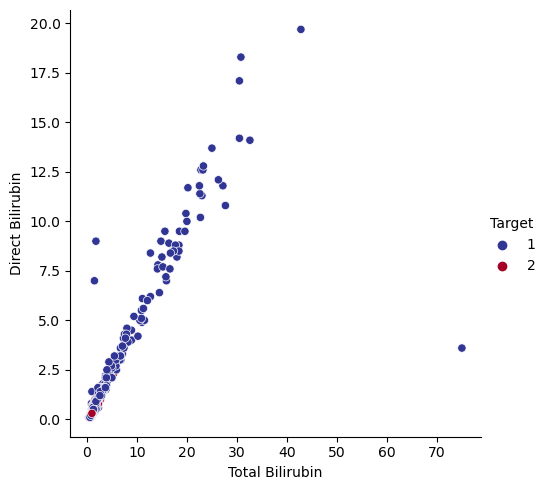

In [21]:
plt.figure(figsize=(5,5))
sns.relplot(x= 'Total Bilirubin',y='Direct Bilirubin',hue='Target',palette='RdYlBu_r',data=data)
plt.show()

<Figure size 500x500 with 0 Axes>

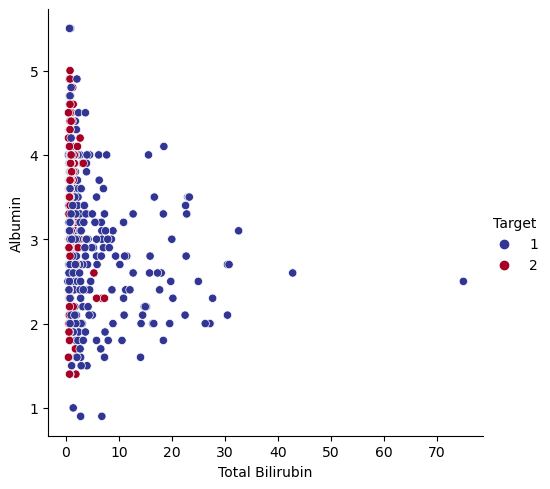

In [22]:
plt.figure(figsize=(5,5),facecolor='white')
sns.relplot(x='Total Bilirubin',y='Albumin',palette='RdYlBu_r',hue='Target',data=data)
plt.show()

<Figure size 500x500 with 0 Axes>

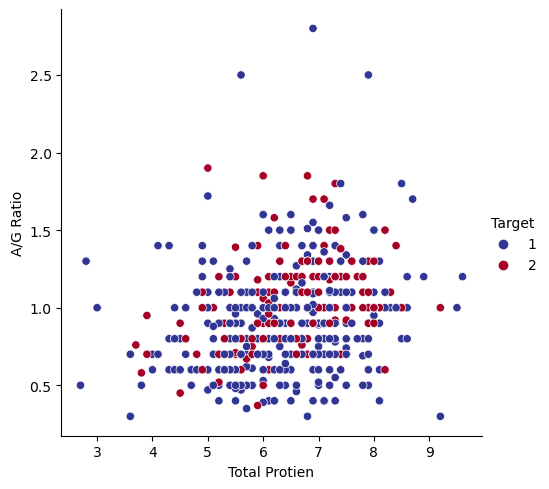

In [23]:
plt.figure(figsize=(5,5),facecolor='white')
sns.relplot(x='Total Protien',y='A/G Ratio',palette='RdYlBu_r',hue='Target',data=data)
plt.show()

### Insights from bivariate analysis
#### ● As the direct bilirubin value increses, the total bilirubin also increases. we can say there is a linear relationship between those two variabels.
#### ● Increase in these to variabels can show that the patient is having liver disease, however we can see that the patient is not having liver disease even when the total bilirunin is greater than 70, this might be a corrupted data.
#### ● By analyzing Albumin and Total together,we can say we need more features to understand. Even when total bilirubin  level is low and albumin is low, the person is having liver disease.
#### ● There seem to be no defined relationship between A/G Ratio and Total Protien as far as liver disease is concerned from the given data. Thus we need other features to get the relation.
#### ● Increase in the level of ALT shows that the patient is having liver disease even for low levels of AST, so there seems to be no defined relationship between those two.

## Multivariate Analysis

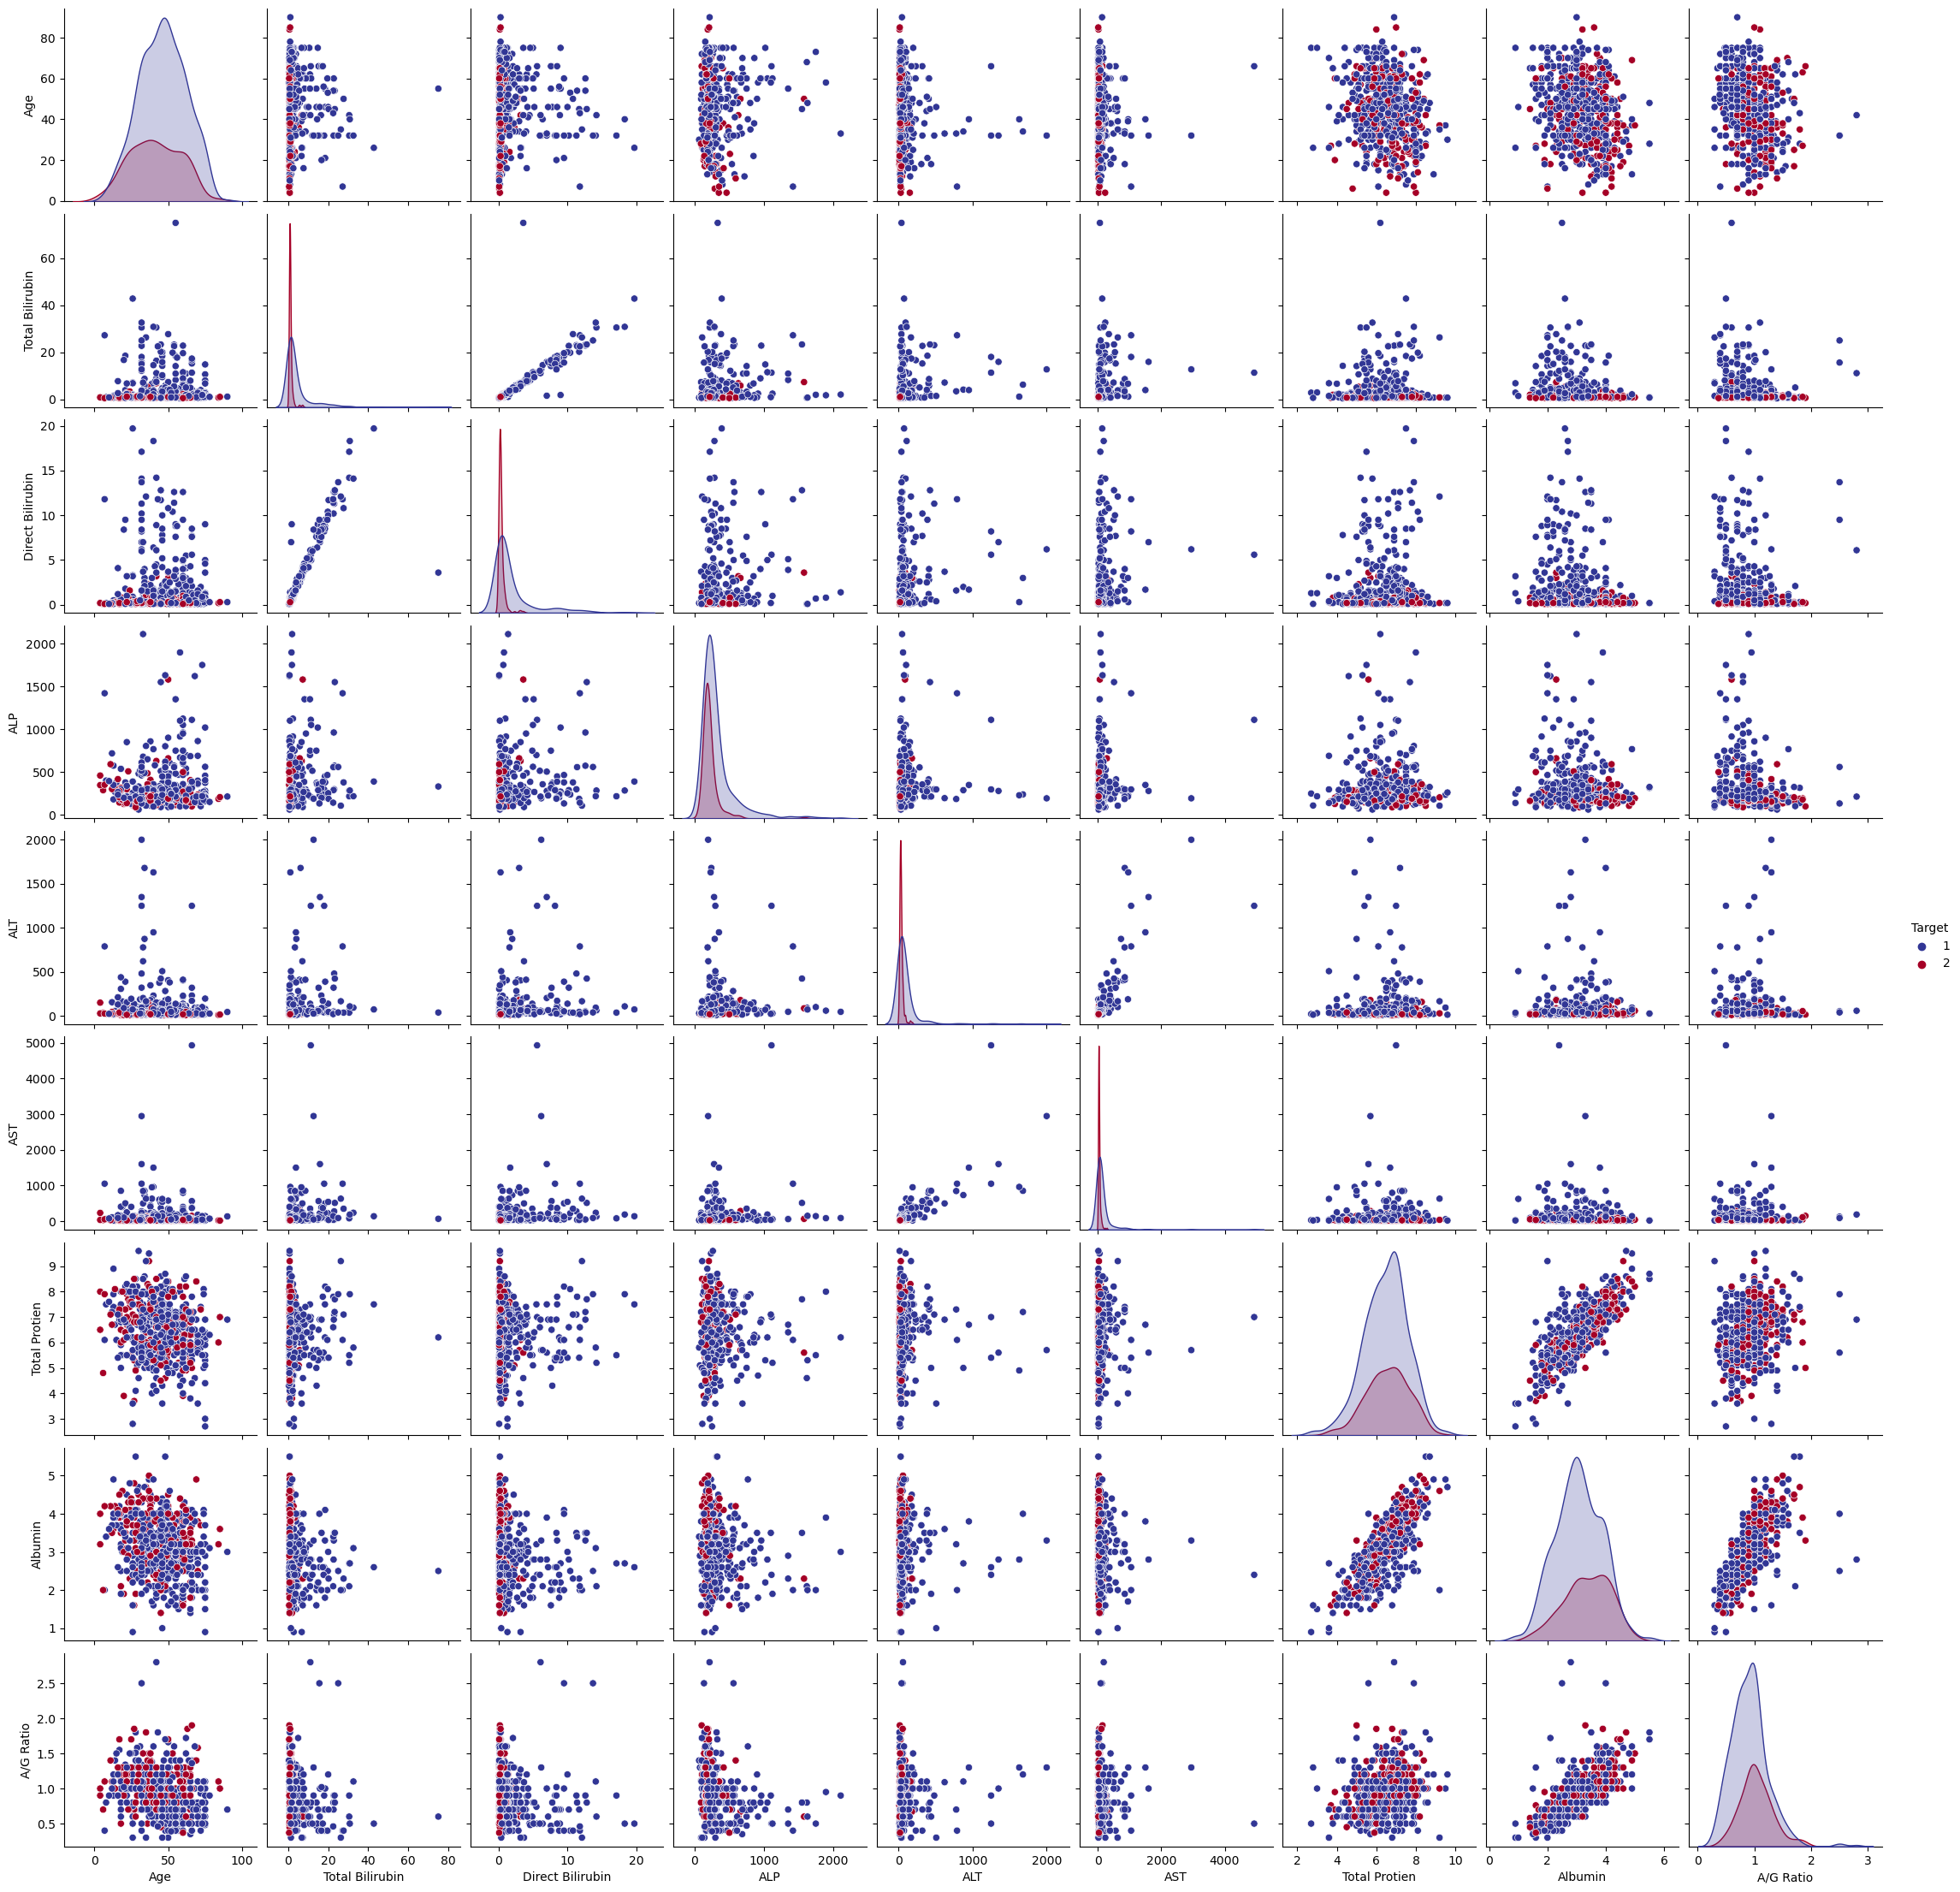

In [24]:
sns.pairplot(data,hue='Target',palette='RdYlBu_r')
plt.show()

### Insights from multivariate analysis
#### ●  With the increase in level of `albumin` the `A/G ratio` also increasing.
#### ● And also `albumin` has direct corelation with total protien of the body.
#### ●  `Total Bilirubin` and `Direct Bilirubin` are directly corelated.

# Data Preprocessing

## Handling missing values

In [25]:
data.isnull().sum()

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
ALP                 0
ALT                 0
AST                 0
Total Protien       0
Albumin             0
A/G Ratio           4
Target              0
dtype: int64

In [26]:
## Finding the location of null values
data.loc[data['A/G Ratio'].isnull()==True]

,Age,Gender,Total Bilirubin,Direct Bilirubin,ALP,ALT,AST,Total Protien,Albumin,A/G Ratio,Target
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [27]:
data['A/G Ratio'].fillna(value = data['A/G Ratio'].median(), inplace=True)

#### As the distribution for A/G Ratio is skewed, we impute the missing values with median

In [28]:
data.isnull().sum()

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
ALP                 0
ALT                 0
AST                 0
Total Protien       0
Albumin             0
A/G Ratio           0
Target              0
dtype: int64

## Handling categorical data

In [29]:
data.Gender.value_counts()

Male      430
Female    140
Name: Gender, dtype: int64

### Encoding Gender
#### Since gender is a nominal data, we use OneHot encoder to convert gender attribute into numerical data treating both the gender are equal
#### 0 represents female
#### 1 respresents male

In [30]:
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True)

In [31]:
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,ALP,ALT,AST,Total Protien,Albumin,A/G Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Rencoding Target
#### Using manual encoding for Target attribute 
#### 0 represents patient with no liver disease
#### 1 represents patient with liver disease

In [32]:
data['Target']= data['Target'].replace({2:0})

## Handling outliers

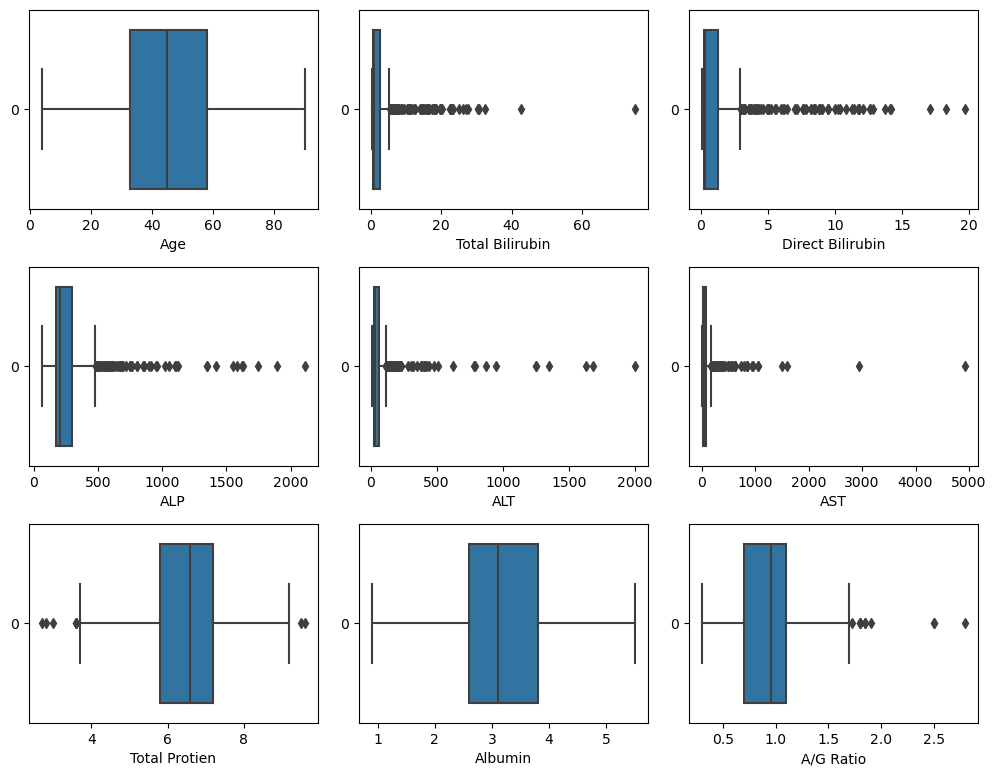

In [33]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1

for column in num_data.columns[:-1]:
   
    plt.subplot(4,3,plotnumber)
    sns.boxplot(data[column],orient='h')
#     data[column].iplot(kind='box')
    plt.xlabel(column,fontsize=10)
    plt.xticks(fontsize=10)
    plotnumber+=1
    
plt.tight_layout()

#### The columns `Total Bilirubin`, `Direct Bilirubin`, `ALP`, `ALT`, `AST`, `Total Protien` and `A/G Ratio` are having most of the data outside the box plot.

#### As the features are not normally distributed, we will find the outliers using IQR method and impute those with minimum limit and maximim limit.

### Total Bilirubin

In [37]:
from scipy import stats
IQR = stats.iqr(data['Total Bilirubin'], interpolation = 'midpoint')

## min and max limit calculation

# First quartile (Q1) 
Q1 = data['Total Bilirubin'].quantile(0.25)

# Third quartile (Q3) 
Q3 =data['Total Bilirubin'].quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR


print(len(data.loc[data['Total Bilirubin']>max_limit]))
print(len(data.loc[data['Total Bilirubin']<min_limit]))

83
0


In [38]:
len(data)

570

In [39]:
83/len(data)*100

14.561403508771932

#### As there are more than 5% outliers in this feature , we are not imputing those.

### Direct bilirubin

In [41]:
IQR = stats.iqr(data['Direct Bilirubin'], interpolation = 'midpoint') 

## min and max limit calculation

# First quartile (Q1) 
Q1 = data['Direct Bilirubin'].quantile(0.25)

# Third quartile (Q3) 
Q3 =data['Direct Bilirubin'].quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

print(len(data.loc[data['Direct Bilirubin']>max_limit]))
print(len(data.loc[data['Direct Bilirubin']<min_limit]))

80
0


In [42]:
80/len(data)*100

14.035087719298245

#### As there are more than 5% outliers in this feature , we are not imputing those.

### ALP

In [43]:
IQR = stats.iqr(data['ALP'], interpolation='midpoint')

## min and max limit calculation

# First quartile (Q1)
Q1 = data['ALP'].quantile(0.25)

# Third quartile (Q3)
Q3 = data['ALP'].quantile(0.75)

min_limit = Q1 - 1.5*IQR
max_limit = Q3 +1.5*IQR

print(len(data.loc[data['ALP']>max_limit]))
print(len(data.loc[data['ALP']<min_limit]))

69
0


In [44]:
69/570*100

12.105263157894736

### ALT

In [45]:
IQR = stats.iqr(data['ALT'], interpolation='midpoint')

## min and max limit calculation

Q1 = data['ALT'].quantile(0.25)
Q3 = data['ALT'].quantile(0.75)

min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

print(len(data.loc[data['ALT']>max_limit]))
print(len(data.loc[data['ALT']<min_limit]))

72
0


In [46]:
72/570*100

12.631578947368421

#### As there are more than 5% outliers in this feature , we are not imputing those.

### AST

In [47]:
IQR = stats.iqr(data['AST'], interpolation='midpoint')

## min and max limit calculation

Q1 = data['AST'].quantile(0.25)
Q3 = data['AST'].quantile(0.75)

min_limit= Q1 - 1.5*IQR
max_limit= Q3 + 1.5*IQR

print(len(data.loc[data['AST']>max_limit]))
print(len(data.loc[data['AST']<min_limit]))

66
0


In [48]:
66/570*100

11.578947368421053

#### As there are more than 5% outliers in this feature , we are not imputing those.

### Total Protien

In [49]:
IQR = stats.iqr(data['Total Protien'], interpolation='midpoint')

## min and max limit calculation

Q1 = data['Total Protien'].quantile(0.25)
Q3 = data['Total Protien'].quantile(0.75)

min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

print(len(data.loc[data['Total Protien']>max_limit]))
print(len(data.loc[data['Total Protien']<min_limit]))

2
6


In [50]:
8/570*100

1.4035087719298245

#### As there are less than 5% outliers in this feature , we are imputing those with maximum and minimum limits.

In [51]:
data.loc[data['Total Protien']>max_limit,'Total Protien'] = max_limit
data.loc[data['Total Protien']<min_limit,'Total Protien'] = min_limit

### A/G Ratio

In [52]:
IQR = stats.iqr(data['A/G Ratio'], interpolation='midpoint')

## min and max limit calculation

Q1 = data['A/G Ratio'].quantile(0.25)
Q3 = data['A/G Ratio'].quantile(0.75)

min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

print(len(data.loc[data['A/G Ratio']>max_limit]))
print(len(data.loc[data['A/G Ratio']<min_limit]))

10
0


In [53]:
10/570*100

1.7543859649122806

#### As there are less than 5% outliers in this feature , we are imputing those with maximum and minimum limits.

In [54]:
data.loc[data['A/G Ratio']>max_limit,'A/G Ratio'] = max_limit
data.loc[data['A/G Ratio']<min_limit,'A/G Ratio'] = min_limit

# Feature Selection

#### No redundant fetaures found in the dataset
#### We will check correlation among independent features

<Axes: >

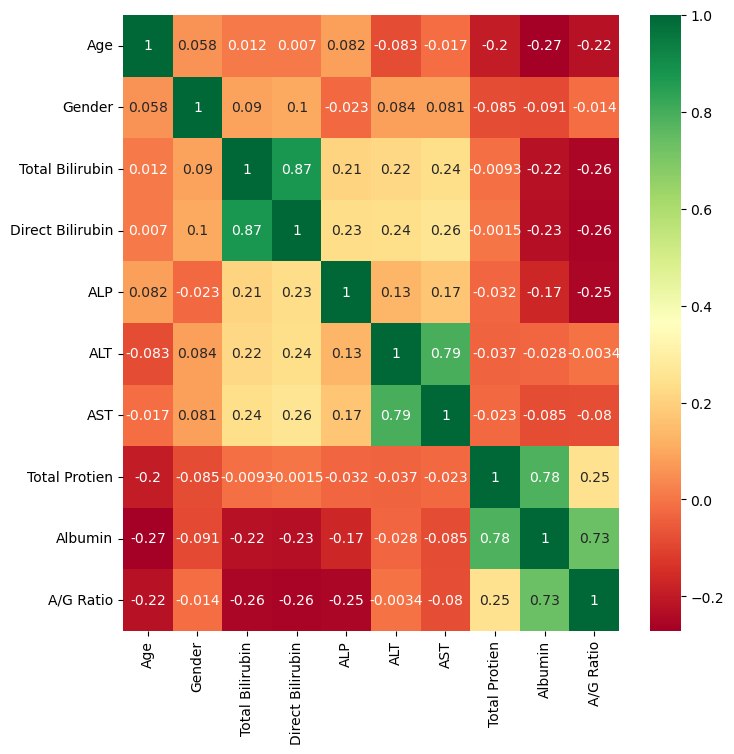

In [55]:
plt.figure(figsize=(8,8))
sns.heatmap(data.drop('Target',axis=1).corr(),annot=True,cmap="RdYlGn")

#### As there is high correlation between the features `Total Bilirubin` and `Direct Bilirubin`, we are dropping 'Total Bilirubin' column

In [56]:
X=data.drop('Total Bilirubin', axis=1, inplace=True)

In [58]:
## Creating independent and dependent variable
X=data.drop('Target',axis=1)
y=data.Target

In [59]:
X

,Age,Gender,Direct Bilirubin,ALP,ALT,AST,Total Protien,Albumin,A/G Ratio
0,65,0,0.1,187,16,18,6.8,3.3,0.90
1,62,1,5.5,699,64,100,7.5,3.2,0.74
2,62,1,4.1,490,60,68,7.0,3.3,0.89
3,58,1,0.4,182,14,20,6.8,3.4,1.00
4,72,1,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
578,60,1,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.2,245,48,49,6.4,3.2,1.00
581,31,1,0.5,184,29,32,6.8,3.4,1.00


### Balancing the target variable

In [60]:
## Counting the tagert variabe for each class
data.Target.value_counts()

1    406
0    164
Name: Target, dtype: int64

#### The proportion of records with target=0 is very less compared to that of target =1. So oversampling is done to handle the imbalanced target dataset

In [61]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_sm, y_sm= sm.fit_resample(X, y)
from collections import Counter
print(Counter(y))
print(Counter(y_sm))

Counter({1: 406, 0: 164})
Counter({1: 406, 0: 406})


### Splitting the data into train set and test set

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2, random_state=6)  ## keeping 20% data for testing

### Scaling the data

#### As we will be using many distance based Machine learning models and since the range of features are not in the same scale, we will scale the data.

In [63]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()

In [64]:
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# Model Creation 

In [65]:
### Importig the required models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [66]:
### Importing requried evaluation metrics

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

## Logistic Regression

In [67]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_train_pred= lr.predict(X_train)
y_test_pred= lr.predict(X_test)

In [68]:
print("metrics on training data \n")

print("confusion matrix: \n", confusion_matrix(y_train_pred,y_train))
print("classification report: \n", classification_report(y_train_pred,y_train))

metrics on training data 

confusion matrix: 
 [[241 109]
 [ 80 219]]
classification report: 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72       350
           1       0.67      0.73      0.70       299

    accuracy                           0.71       649
   macro avg       0.71      0.71      0.71       649
weighted avg       0.71      0.71      0.71       649



In [69]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[61 31]
 [24 47]]
classification report: 
               precision    recall  f1-score   support

           0       0.72      0.66      0.69        92
           1       0.60      0.66      0.63        71

    accuracy                           0.66       163
   macro avg       0.66      0.66      0.66       163
weighted avg       0.67      0.66      0.66       163



### Threshold manipulation

In [75]:
y_pred=lr.predict_proba(X_test)[:,1]
threshold=0.4
y_pred_prob=(y_pred>=threshold).astype(int)

In [76]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,y_pred_prob))
print("classification report: \n", classification_report(y_test,y_pred_prob))

metrics on test data 

confusion matrix: 
 [[34 51]
 [11 67]]
classification report: 
               precision    recall  f1-score   support

           0       0.76      0.40      0.52        85
           1       0.57      0.86      0.68        78

    accuracy                           0.62       163
   macro avg       0.66      0.63      0.60       163
weighted avg       0.67      0.62      0.60       163



In [77]:
roc_auc_score(y_test,y_pred_prob)

0.6294871794871795

In [79]:
#! pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import roc_curve,auc

## KNN

In [82]:
error_rate=[]
for i in range(1, 20):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

Text(0, 0.5, 'error_rate')

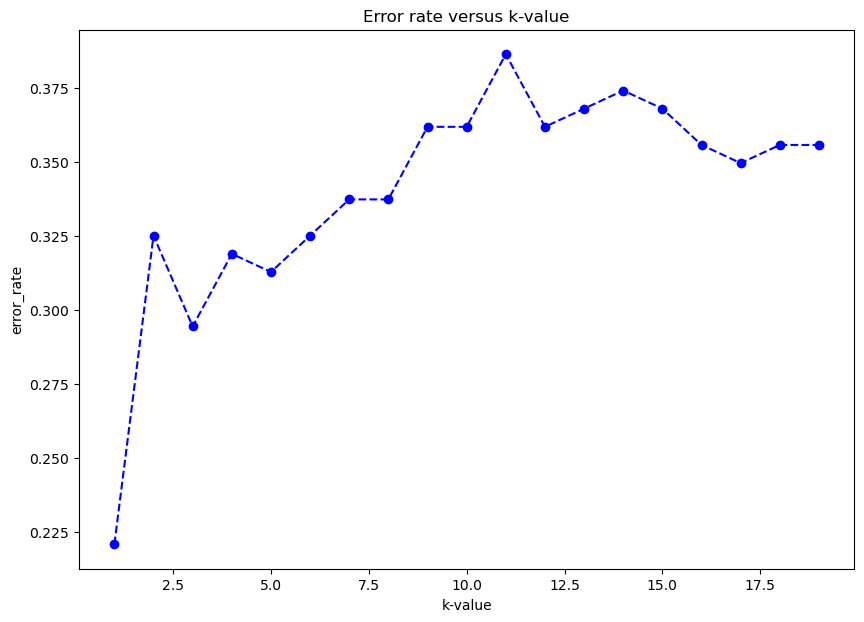

In [83]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='--', marker='o', markersize=6)
plt.title("Error rate versus k-value")
plt.xlabel('k-value')
plt.ylabel('error_rate')

In [84]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [86]:
print("metrics on training data \n")

print("confusion matrix: \n", confusion_matrix(y_train_pred,y_train))
print("classification report: \n", classification_report(y_train_pred,y_train))

metrics on training data 

confusion matrix: 
 [[241 109]
 [ 80 219]]
classification report: 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72       350
           1       0.67      0.73      0.70       299

    accuracy                           0.71       649
   macro avg       0.71      0.71      0.71       649
weighted avg       0.71      0.71      0.71       649



In [87]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[61 31]
 [24 47]]
classification report: 
               precision    recall  f1-score   support

           0       0.72      0.66      0.69        92
           1       0.60      0.66      0.63        71

    accuracy                           0.66       163
   macro avg       0.66      0.66      0.66       163
weighted avg       0.67      0.66      0.66       163



### Threshold manipulation

In [90]:
y_pred=lr.predict_proba(X_test)[:,1]

threshold=0.6
y_pred_prob=(y_pred>=threshold).astype(int)

In [91]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,y_pred_prob))
print("classification report: \n", classification_report(y_test,y_pred_prob))

metrics on test data 

confusion matrix: 
 [[78  7]
 [45 33]]
classification report: 
               precision    recall  f1-score   support

           0       0.63      0.92      0.75        85
           1       0.82      0.42      0.56        78

    accuracy                           0.68       163
   macro avg       0.73      0.67      0.65       163
weighted avg       0.73      0.68      0.66       163



In [92]:
y_scores = y_pred_prob
y_true = y_test

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc= auc(fpr,tpr)

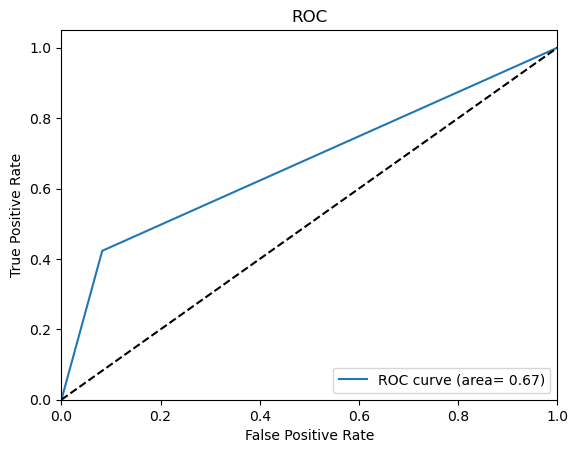

In [93]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## SVC

In [94]:
svc= SVC(probability=True)
svc.fit(X_train, y_train)

y_train_pred= svc.predict(X_train)
y_test_pred= svc.predict(X_test)

In [95]:
print("metrics on training data \n")

print("confusion matrix: \n", confusion_matrix(y_train_pred,y_train))
print("classification report: \n", classification_report(y_train_pred,y_train))

metrics on training data 

confusion matrix: 
 [[263 127]
 [ 58 201]]
classification report: 
               precision    recall  f1-score   support

           0       0.82      0.67      0.74       390
           1       0.61      0.78      0.68       259

    accuracy                           0.71       649
   macro avg       0.72      0.73      0.71       649
weighted avg       0.74      0.71      0.72       649



In [96]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[72 37]
 [13 41]]
classification report: 
               precision    recall  f1-score   support

           0       0.85      0.66      0.74       109
           1       0.53      0.76      0.62        54

    accuracy                           0.69       163
   macro avg       0.69      0.71      0.68       163
weighted avg       0.74      0.69      0.70       163



In [97]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc,X,y,cv=5,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.83673469 0.83076923 0.83076923 0.83076923 0.83076923]
Cross validation Score: 0.8319623233908949
Std : 0.0023861852433280984


### Threshold manipulation

In [98]:
y_pred=svc.predict_proba(X_test)[:,1]

threshold=0.35
y_pred_prob=(y_pred>=threshold).astype(int)

In [99]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,y_pred_prob))
print("classification report: \n", classification_report(y_test,y_pred_prob))

metrics on test data 

confusion matrix: 
 [[45 40]
 [15 63]]
classification report: 
               precision    recall  f1-score   support

           0       0.75      0.53      0.62        85
           1       0.61      0.81      0.70        78

    accuracy                           0.66       163
   macro avg       0.68      0.67      0.66       163
weighted avg       0.68      0.66      0.66       163



In [100]:
y_scores = y_pred_prob
y_true = y_test

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc= auc(fpr,tpr)

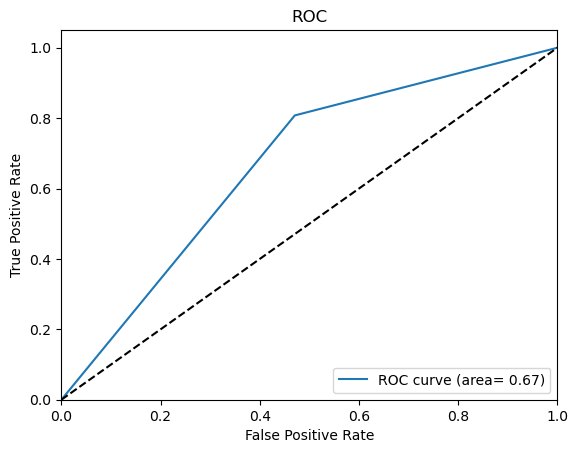

In [101]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes

In [102]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_train_pred= nb.predict(X_train)
y_test_pred= nb.predict(X_test)

In [103]:
print("metrics on training data \n")

print("confusion matrix: \n", confusion_matrix(y_train_pred,y_train))
print("classification report: \n", classification_report(y_train_pred,y_train))

metrics on training data 

confusion matrix: 
 [[309 181]
 [ 12 147]]
classification report: 
               precision    recall  f1-score   support

           0       0.96      0.63      0.76       490
           1       0.45      0.92      0.60       159

    accuracy                           0.70       649
   macro avg       0.71      0.78      0.68       649
weighted avg       0.84      0.70      0.72       649



In [104]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[81 48]
 [ 4 30]]
classification report: 
               precision    recall  f1-score   support

           0       0.95      0.63      0.76       129
           1       0.38      0.88      0.54        34

    accuracy                           0.68       163
   macro avg       0.67      0.76      0.65       163
weighted avg       0.83      0.68      0.71       163



In [118]:
y_scores = y_pred_prob
y_true = y_test

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc= auc(fpr,tpr)

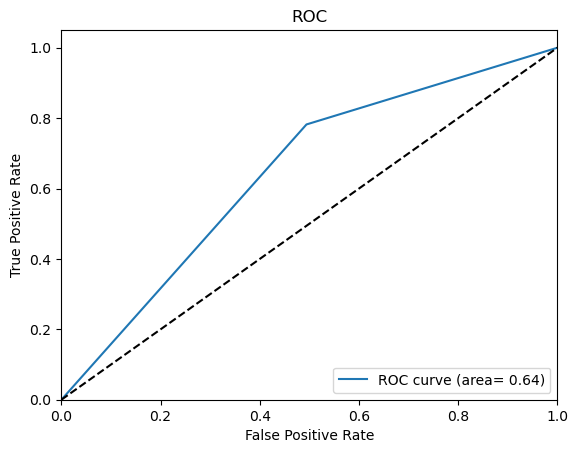

In [119]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Desicion Tree

In [105]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_train_pred= dt.predict(X_train)
y_test_pred= dt.predict(X_test)

In [106]:
print("metrics on training data \n")

print("confusion matrix: \n", confusion_matrix(y_train_pred,y_train))
print("classification report: \n", classification_report(y_train_pred,y_train))

metrics on training data 

confusion matrix: 
 [[321   0]
 [  0 328]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       328

    accuracy                           1.00       649
   macro avg       1.00      1.00      1.00       649
weighted avg       1.00      1.00      1.00       649



In [107]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[59 21]
 [26 57]]
classification report: 
               precision    recall  f1-score   support

           0       0.69      0.74      0.72        80
           1       0.73      0.69      0.71        83

    accuracy                           0.71       163
   macro avg       0.71      0.71      0.71       163
weighted avg       0.71      0.71      0.71       163



### Threshold manipulation

In [110]:
y_pred=dt.predict_proba(X_test)[:,1]
threshold=0.3
y_pred_prob=(y_pred>=threshold).astype(int)

In [111]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred_prob,y_test))
print("classification report: \n", classification_report(y_pred_prob,y_test))

metrics on test data 

confusion matrix: 
 [[59 21]
 [26 57]]
classification report: 
               precision    recall  f1-score   support

           0       0.69      0.74      0.72        80
           1       0.73      0.69      0.71        83

    accuracy                           0.71       163
   macro avg       0.71      0.71      0.71       163
weighted avg       0.71      0.71      0.71       163



In [112]:
y_scores = y_pred_prob
y_true = y_test

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc= auc(fpr,tpr)

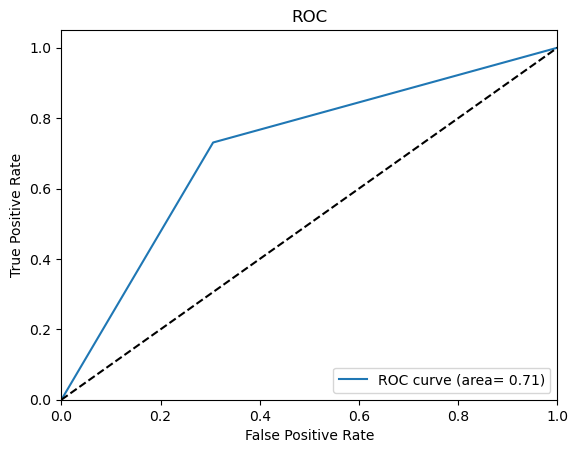

In [113]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [114]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_train_pred= rf.predict(X_train)
y_test_pred= rf.predict(X_test)

In [115]:
print("metrics on training data \n")

print("confusion matrix: \n", confusion_matrix(y_train_pred,y_train))
print("classification report: \n", classification_report(y_train_pred,y_train))

metrics on training data 

confusion matrix: 
 [[321   0]
 [  0 328]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       328

    accuracy                           1.00       649
   macro avg       1.00      1.00      1.00       649
weighted avg       1.00      1.00      1.00       649



In [116]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[77 20]
 [ 8 58]]
classification report: 
               precision    recall  f1-score   support

           0       0.91      0.79      0.85        97
           1       0.74      0.88      0.81        66

    accuracy                           0.83       163
   macro avg       0.82      0.84      0.83       163
weighted avg       0.84      0.83      0.83       163



### Threshold manipulation

In [143]:
y_pred=rf.predict_proba(X_test)[:,1]
threshold=0.42
y_pred_prob=(y_pred>=threshold).astype(int)

In [144]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,y_pred_prob))
print("classification report: \n", classification_report(y_test,y_pred_prob))

metrics on test data 

confusion matrix: 
 [[68 17]
 [13 65]]
classification report: 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        85
           1       0.79      0.83      0.81        78

    accuracy                           0.82       163
   macro avg       0.82      0.82      0.82       163
weighted avg       0.82      0.82      0.82       163



In [145]:
y_scores = y_pred_prob
y_true = y_test

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc= auc(fpr,tpr)

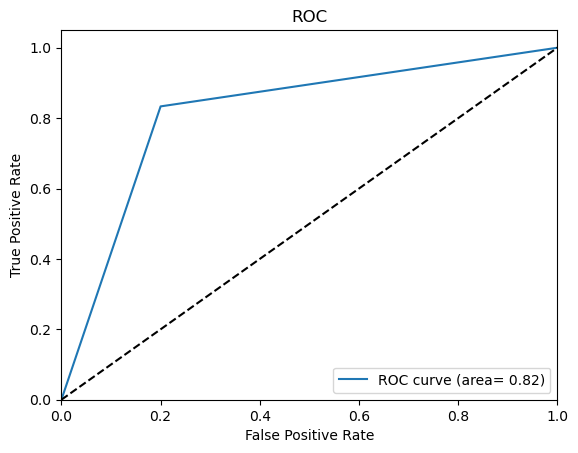

In [146]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Bagging Classifier

In [147]:
# Logistic Regression
bag=BaggingClassifier(base_estimator=lr,n_estimators=20)

bag.fit(X_train,y_train)
y_train_pred= bag.predict(X_train)
y_test_pred= bag.predict(X_test)

In [148]:
print("metrics on training data \n")

print("confusion matrix: \n", confusion_matrix(y_train_pred,y_train))
print("classification report: \n", classification_report(y_train_pred,y_train))

metrics on training data 

confusion matrix: 
 [[243 108]
 [ 78 220]]
classification report: 
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       351
           1       0.67      0.74      0.70       298

    accuracy                           0.71       649
   macro avg       0.71      0.72      0.71       649
weighted avg       0.72      0.71      0.71       649



In [149]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[60 33]
 [25 45]]
classification report: 
               precision    recall  f1-score   support

           0       0.71      0.65      0.67        93
           1       0.58      0.64      0.61        70

    accuracy                           0.64       163
   macro avg       0.64      0.64      0.64       163
weighted avg       0.65      0.64      0.65       163



In [150]:
# Desicion Tree
bag=BaggingClassifier(base_estimator=dt,n_estimators=20)

bag.fit(X_train,y_train)
y_train_pred= bag.predict(X_train)
y_test_pred= bag.predict(X_test)

In [151]:
print("metrics on training data \n")

print("confusion matrix: \n", confusion_matrix(y_train_pred,y_train))
print("classification report: \n", classification_report(y_train_pred,y_train))

metrics on training data 

confusion matrix: 
 [[321   1]
 [  0 327]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       327

    accuracy                           1.00       649
   macro avg       1.00      1.00      1.00       649
weighted avg       1.00      1.00      1.00       649



In [152]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[76 23]
 [ 9 55]]
classification report: 
               precision    recall  f1-score   support

           0       0.89      0.77      0.83        99
           1       0.71      0.86      0.77        64

    accuracy                           0.80       163
   macro avg       0.80      0.81      0.80       163
weighted avg       0.82      0.80      0.81       163



### Threshold manipulation

In [183]:
y_pred=bag.predict_proba(X_test)[:,1]
threshold=0.42
y_pred_prob=(y_pred>=threshold).astype(int)

In [184]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,y_pred_prob))
print("classification report: \n", classification_report(y_test,y_pred_prob))

metrics on test data 

confusion matrix: 
 [[73 12]
 [16 62]]
classification report: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        85
           1       0.84      0.79      0.82        78

    accuracy                           0.83       163
   macro avg       0.83      0.83      0.83       163
weighted avg       0.83      0.83      0.83       163



In [185]:
y_scores = y_pred_prob
y_true = y_test

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc= auc(fpr,tpr)

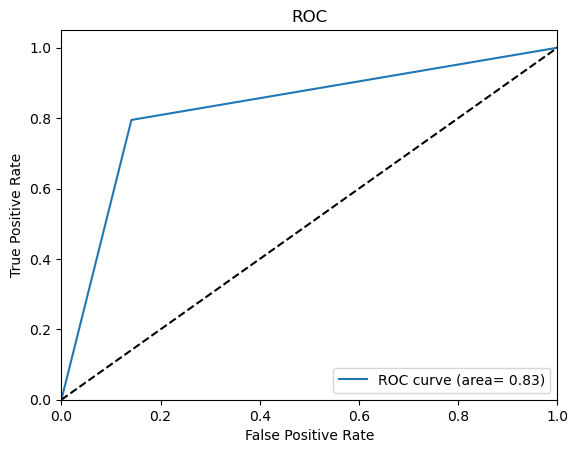

In [186]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [187]:
# Random Forest
bag=BaggingClassifier(base_estimator=rf,n_estimators=100)

bag.fit(X_train,y_train)
y_train_pred= bag.predict(X_train)
y_test_pred= bag.predict(X_test)

In [188]:
print("metrics on training data \n")

print("confusion matrix: \n", confusion_matrix(y_train_pred,y_train))
print("classification report: \n", classification_report(y_train_pred,y_train))

metrics on training data 

confusion matrix: 
 [[318   2]
 [  3 326]]
classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       320
           1       0.99      0.99      0.99       329

    accuracy                           0.99       649
   macro avg       0.99      0.99      0.99       649
weighted avg       0.99      0.99      0.99       649



In [189]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[77 19]
 [ 8 59]]
classification report: 
               precision    recall  f1-score   support

           0       0.91      0.80      0.85        96
           1       0.76      0.88      0.81        67

    accuracy                           0.83       163
   macro avg       0.83      0.84      0.83       163
weighted avg       0.84      0.83      0.84       163



### Threshold manipulation

In [206]:
y_pred=bag.predict_proba(X_test)[:,1]
threshold=0.48
y_pred_prob=(y_pred>=threshold).astype(int)

In [207]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,y_pred_prob))
print("classification report: \n", classification_report(y_test,y_pred_prob))

metrics on test data 

confusion matrix: 
 [[75 10]
 [15 63]]
classification report: 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86        85
           1       0.86      0.81      0.83        78

    accuracy                           0.85       163
   macro avg       0.85      0.85      0.85       163
weighted avg       0.85      0.85      0.85       163



In [208]:
y_scores = y_pred_prob
y_true = y_test

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc= auc(fpr,tpr)

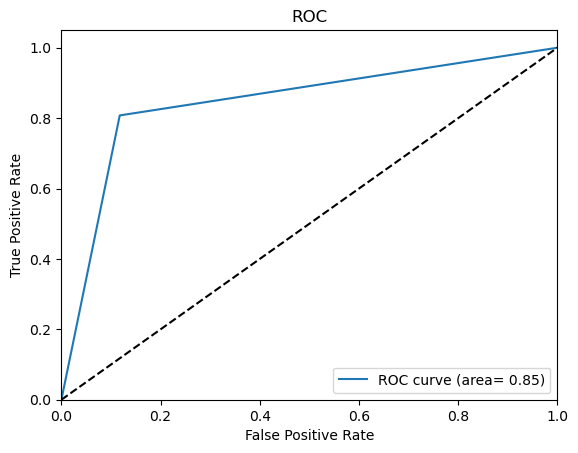

In [209]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting

In [210]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

y_train_pred= gb.predict(X_train)
y_test_pred= gb.predict(X_test)

In [211]:
print("metrics on training data \n")

print("confusion matrix: \n", confusion_matrix(y_train_pred,y_train))
print("classification report: \n", classification_report(y_train_pred,y_train))

metrics on training data 

confusion matrix: 
 [[302  35]
 [ 19 293]]
classification report: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       337
           1       0.89      0.94      0.92       312

    accuracy                           0.92       649
   macro avg       0.92      0.92      0.92       649
weighted avg       0.92      0.92      0.92       649



In [212]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[70 20]
 [15 58]]
classification report: 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        90
           1       0.74      0.79      0.77        73

    accuracy                           0.79       163
   macro avg       0.78      0.79      0.78       163
weighted avg       0.79      0.79      0.79       163



### Threshold manipulation

In [235]:
y_pred=gb.predict_proba(X_test)[:,1]
threshold=0.56
y_pred_prob=(y_pred>=threshold).astype(int)

In [236]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,y_pred_prob))
print("classification report: \n", classification_report(y_test,y_pred_prob))

metrics on test data 

confusion matrix: 
 [[75 10]
 [26 52]]
classification report: 
               precision    recall  f1-score   support

           0       0.74      0.88      0.81        85
           1       0.84      0.67      0.74        78

    accuracy                           0.78       163
   macro avg       0.79      0.77      0.77       163
weighted avg       0.79      0.78      0.78       163



In [237]:
y_scores = y_pred_prob
y_true = y_test

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc= auc(fpr,tpr)

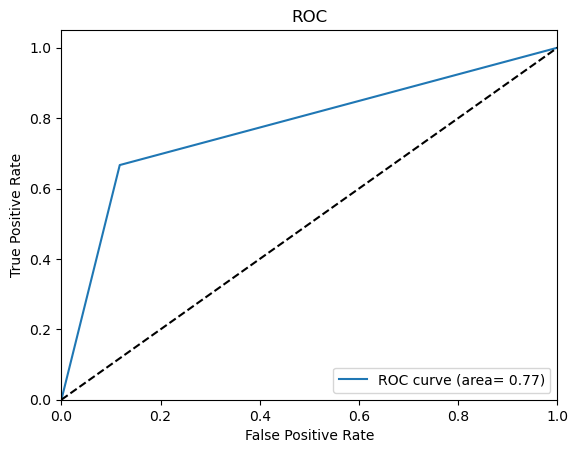

In [238]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## XGBoost

In [239]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_train_pred= xgb.predict(X_train)
y_test_pred= xgb.predict(X_test)

In [240]:
print("metrics on training data \n")

print("confusion matrix: \n", confusion_matrix(y_train_pred,y_train))
print("classification report: \n", classification_report(y_train_pred,y_train))

metrics on training data 

confusion matrix: 
 [[321   0]
 [  0 328]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       328

    accuracy                           1.00       649
   macro avg       1.00      1.00      1.00       649
weighted avg       1.00      1.00      1.00       649



In [241]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[74 17]
 [11 61]]
classification report: 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        91
           1       0.78      0.85      0.81        72

    accuracy                           0.83       163
   macro avg       0.83      0.83      0.83       163
weighted avg       0.83      0.83      0.83       163



### Threshold manipulation

In [256]:
y_pred=xgb.predict_proba(X_test)[:,1]
threshold=0.42
y_pred_prob=(y_pred>=threshold).astype(int)

In [257]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,y_pred_prob))
print("classification report: \n", classification_report(y_test,y_pred_prob))

metrics on test data 

confusion matrix: 
 [[71 14]
 [10 68]]
classification report: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86        85
           1       0.83      0.87      0.85        78

    accuracy                           0.85       163
   macro avg       0.85      0.85      0.85       163
weighted avg       0.85      0.85      0.85       163



In [258]:
y_scores = y_pred_prob
y_true = y_test

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc= auc(fpr,tpr)

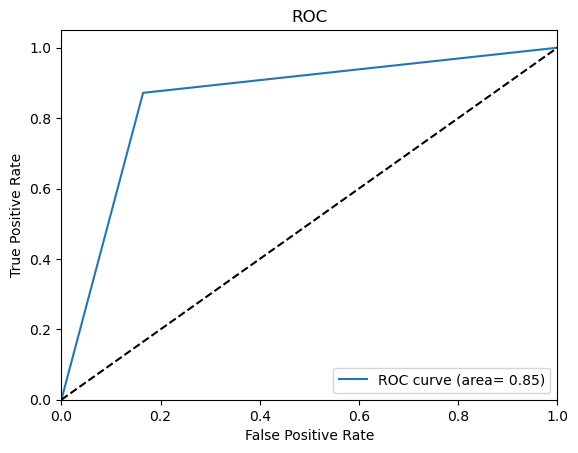

In [259]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## ANN

In [260]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [261]:
model=Sequential()

model.add(Dense(100,activation='relu',kernel_initializer='GlorotUniform'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu',kernel_initializer='GlorotUniform'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu',kernel_initializer='GlorotUniform'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu',kernel_initializer='GlorotUniform'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu',kernel_initializer='GlorotUniform'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu',kernel_initializer='GlorotUniform'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [265]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(),
              loss=tensorflow.keras.losses.BinaryCrossentropy(),
             metrics=tensorflow.keras.metrics.FalseNegatives())

In [266]:
model.fit(X_train,y_train,epochs=1000,workers=-1,verbose=2)
model_pred=model.predict(X_test)

Epoch 1/1000
21/21 - 18s - loss: 0.6916 - false_negatives: 210.0000 - 18s/epoch - 840ms/step
Epoch 2/1000
21/21 - 0s - loss: 0.6847 - false_negatives: 64.0000 - 316ms/epoch - 15ms/step
Epoch 3/1000
21/21 - 0s - loss: 0.6711 - false_negatives: 98.0000 - 316ms/epoch - 15ms/step
Epoch 4/1000
21/21 - 0s - loss: 0.6376 - false_negatives: 106.0000 - 315ms/epoch - 15ms/step
Epoch 5/1000
21/21 - 0s - loss: 0.6099 - false_negatives: 111.0000 - 310ms/epoch - 15ms/step
Epoch 6/1000
21/21 - 0s - loss: 0.6096 - false_negatives: 140.0000 - 315ms/epoch - 15ms/step
Epoch 7/1000
21/21 - 0s - loss: 0.6080 - false_negatives: 159.0000 - 322ms/epoch - 15ms/step
Epoch 8/1000
21/21 - 0s - loss: 0.5843 - false_negatives: 139.0000 - 324ms/epoch - 15ms/step
Epoch 9/1000
21/21 - 0s - loss: 0.5717 - false_negatives: 134.0000 - 332ms/epoch - 16ms/step
Epoch 10/1000
21/21 - 0s - loss: 0.5676 - false_negatives: 147.0000 - 332ms/epoch - 16ms/step
Epoch 11/1000
21/21 - 0s - loss: 0.5626 - false_negatives: 124.0000 - 3

Epoch 89/1000
21/21 - 0s - loss: 0.4668 - false_negatives: 111.0000 - 291ms/epoch - 14ms/step
Epoch 90/1000
21/21 - 0s - loss: 0.4660 - false_negatives: 132.0000 - 289ms/epoch - 14ms/step
Epoch 91/1000
21/21 - 0s - loss: 0.4757 - false_negatives: 127.0000 - 287ms/epoch - 14ms/step
Epoch 92/1000
21/21 - 0s - loss: 0.4874 - false_negatives: 128.0000 - 285ms/epoch - 14ms/step
Epoch 93/1000
21/21 - 0s - loss: 0.4627 - false_negatives: 122.0000 - 286ms/epoch - 14ms/step
Epoch 94/1000
21/21 - 0s - loss: 0.4700 - false_negatives: 121.0000 - 286ms/epoch - 14ms/step
Epoch 95/1000
21/21 - 0s - loss: 0.4658 - false_negatives: 121.0000 - 290ms/epoch - 14ms/step
Epoch 96/1000
21/21 - 0s - loss: 0.4723 - false_negatives: 126.0000 - 287ms/epoch - 14ms/step
Epoch 97/1000
21/21 - 0s - loss: 0.4679 - false_negatives: 119.0000 - 290ms/epoch - 14ms/step
Epoch 98/1000
21/21 - 0s - loss: 0.4644 - false_negatives: 118.0000 - 288ms/epoch - 14ms/step
Epoch 99/1000
21/21 - 0s - loss: 0.4703 - false_negatives: 1

Epoch 176/1000
21/21 - 0s - loss: 0.4198 - false_negatives: 105.0000 - 373ms/epoch - 18ms/step
Epoch 177/1000
21/21 - 0s - loss: 0.4276 - false_negatives: 112.0000 - 429ms/epoch - 20ms/step
Epoch 178/1000
21/21 - 0s - loss: 0.4293 - false_negatives: 123.0000 - 336ms/epoch - 16ms/step
Epoch 179/1000
21/21 - 0s - loss: 0.4144 - false_negatives: 116.0000 - 345ms/epoch - 16ms/step
Epoch 180/1000
21/21 - 0s - loss: 0.4359 - false_negatives: 117.0000 - 339ms/epoch - 16ms/step
Epoch 181/1000
21/21 - 0s - loss: 0.4130 - false_negatives: 106.0000 - 330ms/epoch - 16ms/step
Epoch 182/1000
21/21 - 0s - loss: 0.4054 - false_negatives: 120.0000 - 329ms/epoch - 16ms/step
Epoch 183/1000
21/21 - 0s - loss: 0.4315 - false_negatives: 104.0000 - 322ms/epoch - 15ms/step
Epoch 184/1000
21/21 - 0s - loss: 0.4402 - false_negatives: 119.0000 - 314ms/epoch - 15ms/step
Epoch 185/1000
21/21 - 0s - loss: 0.4300 - false_negatives: 114.0000 - 320ms/epoch - 15ms/step
Epoch 186/1000
21/21 - 0s - loss: 0.4144 - false_n

Epoch 263/1000
21/21 - 0s - loss: 0.3880 - false_negatives: 112.0000 - 342ms/epoch - 16ms/step
Epoch 264/1000
21/21 - 0s - loss: 0.3930 - false_negatives: 106.0000 - 341ms/epoch - 16ms/step
Epoch 265/1000
21/21 - 0s - loss: 0.3829 - false_negatives: 115.0000 - 339ms/epoch - 16ms/step
Epoch 266/1000
21/21 - 0s - loss: 0.3779 - false_negatives: 108.0000 - 339ms/epoch - 16ms/step
Epoch 267/1000
21/21 - 0s - loss: 0.3898 - false_negatives: 102.0000 - 344ms/epoch - 16ms/step
Epoch 268/1000
21/21 - 0s - loss: 0.4153 - false_negatives: 124.0000 - 336ms/epoch - 16ms/step
Epoch 269/1000
21/21 - 0s - loss: 0.3846 - false_negatives: 111.0000 - 334ms/epoch - 16ms/step
Epoch 270/1000
21/21 - 0s - loss: 0.3803 - false_negatives: 97.0000 - 337ms/epoch - 16ms/step
Epoch 271/1000
21/21 - 0s - loss: 0.3879 - false_negatives: 105.0000 - 342ms/epoch - 16ms/step
Epoch 272/1000
21/21 - 0s - loss: 0.3860 - false_negatives: 103.0000 - 340ms/epoch - 16ms/step
Epoch 273/1000
21/21 - 0s - loss: 0.3813 - false_ne

Epoch 350/1000
21/21 - 0s - loss: 0.3504 - false_negatives: 94.0000 - 340ms/epoch - 16ms/step
Epoch 351/1000
21/21 - 0s - loss: 0.3431 - false_negatives: 89.0000 - 333ms/epoch - 16ms/step
Epoch 352/1000
21/21 - 0s - loss: 0.3709 - false_negatives: 99.0000 - 334ms/epoch - 16ms/step
Epoch 353/1000
21/21 - 0s - loss: 0.3612 - false_negatives: 84.0000 - 347ms/epoch - 17ms/step
Epoch 354/1000
21/21 - 0s - loss: 0.3516 - false_negatives: 103.0000 - 331ms/epoch - 16ms/step
Epoch 355/1000
21/21 - 0s - loss: 0.3634 - false_negatives: 100.0000 - 332ms/epoch - 16ms/step
Epoch 356/1000
21/21 - 0s - loss: 0.3486 - false_negatives: 90.0000 - 336ms/epoch - 16ms/step
Epoch 357/1000
21/21 - 0s - loss: 0.3697 - false_negatives: 93.0000 - 337ms/epoch - 16ms/step
Epoch 358/1000
21/21 - 0s - loss: 0.3347 - false_negatives: 97.0000 - 341ms/epoch - 16ms/step
Epoch 359/1000
21/21 - 0s - loss: 0.3363 - false_negatives: 86.0000 - 344ms/epoch - 16ms/step
Epoch 360/1000
21/21 - 0s - loss: 0.3410 - false_negatives

21/21 - 0s - loss: 0.3163 - false_negatives: 70.0000 - 428ms/epoch - 20ms/step
Epoch 438/1000
21/21 - 0s - loss: 0.3290 - false_negatives: 79.0000 - 390ms/epoch - 19ms/step
Epoch 439/1000
21/21 - 0s - loss: 0.3004 - false_negatives: 77.0000 - 425ms/epoch - 20ms/step
Epoch 440/1000
21/21 - 0s - loss: 0.2994 - false_negatives: 85.0000 - 369ms/epoch - 18ms/step
Epoch 441/1000
21/21 - 0s - loss: 0.3089 - false_negatives: 75.0000 - 362ms/epoch - 17ms/step
Epoch 442/1000
21/21 - 0s - loss: 0.3410 - false_negatives: 72.0000 - 363ms/epoch - 17ms/step
Epoch 443/1000
21/21 - 0s - loss: 0.3316 - false_negatives: 95.0000 - 373ms/epoch - 18ms/step
Epoch 444/1000
21/21 - 0s - loss: 0.3291 - false_negatives: 88.0000 - 360ms/epoch - 17ms/step
Epoch 445/1000
21/21 - 0s - loss: 0.3145 - false_negatives: 75.0000 - 412ms/epoch - 20ms/step
Epoch 446/1000
21/21 - 0s - loss: 0.3037 - false_negatives: 82.0000 - 376ms/epoch - 18ms/step
Epoch 447/1000
21/21 - 0s - loss: 0.3282 - false_negatives: 75.0000 - 405ms

Epoch 525/1000
21/21 - 0s - loss: 0.2846 - false_negatives: 61.0000 - 308ms/epoch - 15ms/step
Epoch 526/1000
21/21 - 0s - loss: 0.2827 - false_negatives: 69.0000 - 382ms/epoch - 18ms/step
Epoch 527/1000
21/21 - 0s - loss: 0.3161 - false_negatives: 78.0000 - 367ms/epoch - 17ms/step
Epoch 528/1000
21/21 - 0s - loss: 0.3128 - false_negatives: 83.0000 - 371ms/epoch - 18ms/step
Epoch 529/1000
21/21 - 0s - loss: 0.2985 - false_negatives: 60.0000 - 376ms/epoch - 18ms/step
Epoch 530/1000
21/21 - 0s - loss: 0.2789 - false_negatives: 70.0000 - 371ms/epoch - 18ms/step
Epoch 531/1000
21/21 - 0s - loss: 0.2983 - false_negatives: 70.0000 - 377ms/epoch - 18ms/step
Epoch 532/1000
21/21 - 0s - loss: 0.2740 - false_negatives: 69.0000 - 306ms/epoch - 15ms/step
Epoch 533/1000
21/21 - 0s - loss: 0.3066 - false_negatives: 72.0000 - 317ms/epoch - 15ms/step
Epoch 534/1000
21/21 - 0s - loss: 0.2932 - false_negatives: 72.0000 - 339ms/epoch - 16ms/step
Epoch 535/1000
21/21 - 0s - loss: 0.2751 - false_negatives: 

21/21 - 0s - loss: 0.2784 - false_negatives: 63.0000 - 294ms/epoch - 14ms/step
Epoch 613/1000
21/21 - 0s - loss: 0.2596 - false_negatives: 55.0000 - 292ms/epoch - 14ms/step
Epoch 614/1000
21/21 - 0s - loss: 0.2676 - false_negatives: 62.0000 - 294ms/epoch - 14ms/step
Epoch 615/1000
21/21 - 0s - loss: 0.2604 - false_negatives: 55.0000 - 305ms/epoch - 15ms/step
Epoch 616/1000
21/21 - 0s - loss: 0.2765 - false_negatives: 63.0000 - 290ms/epoch - 14ms/step
Epoch 617/1000
21/21 - 0s - loss: 0.2735 - false_negatives: 58.0000 - 333ms/epoch - 16ms/step
Epoch 618/1000
21/21 - 0s - loss: 0.2935 - false_negatives: 64.0000 - 342ms/epoch - 16ms/step
Epoch 619/1000
21/21 - 0s - loss: 0.2607 - false_negatives: 61.0000 - 322ms/epoch - 15ms/step
Epoch 620/1000
21/21 - 0s - loss: 0.3088 - false_negatives: 61.0000 - 319ms/epoch - 15ms/step
Epoch 621/1000
21/21 - 0s - loss: 0.2907 - false_negatives: 70.0000 - 298ms/epoch - 14ms/step
Epoch 622/1000
21/21 - 0s - loss: 0.2847 - false_negatives: 68.0000 - 369ms

Epoch 700/1000
21/21 - 0s - loss: 0.2645 - false_negatives: 56.0000 - 328ms/epoch - 16ms/step
Epoch 701/1000
21/21 - 0s - loss: 0.2742 - false_negatives: 60.0000 - 321ms/epoch - 15ms/step
Epoch 702/1000
21/21 - 0s - loss: 0.2516 - false_negatives: 58.0000 - 380ms/epoch - 18ms/step
Epoch 703/1000
21/21 - 0s - loss: 0.2782 - false_negatives: 69.0000 - 349ms/epoch - 17ms/step
Epoch 704/1000
21/21 - 0s - loss: 0.2815 - false_negatives: 67.0000 - 360ms/epoch - 17ms/step
Epoch 705/1000
21/21 - 0s - loss: 0.2585 - false_negatives: 61.0000 - 358ms/epoch - 17ms/step
Epoch 706/1000
21/21 - 0s - loss: 0.2642 - false_negatives: 51.0000 - 360ms/epoch - 17ms/step
Epoch 707/1000
21/21 - 0s - loss: 0.2403 - false_negatives: 56.0000 - 404ms/epoch - 19ms/step
Epoch 708/1000
21/21 - 0s - loss: 0.2309 - false_negatives: 52.0000 - 394ms/epoch - 19ms/step
Epoch 709/1000
21/21 - 0s - loss: 0.3045 - false_negatives: 56.0000 - 383ms/epoch - 18ms/step
Epoch 710/1000
21/21 - 0s - loss: 0.2835 - false_negatives: 

21/21 - 0s - loss: 0.2745 - false_negatives: 60.0000 - 309ms/epoch - 15ms/step
Epoch 788/1000
21/21 - 0s - loss: 0.2755 - false_negatives: 62.0000 - 307ms/epoch - 15ms/step
Epoch 789/1000
21/21 - 0s - loss: 0.2494 - false_negatives: 57.0000 - 306ms/epoch - 15ms/step
Epoch 790/1000
21/21 - 0s - loss: 0.2528 - false_negatives: 56.0000 - 309ms/epoch - 15ms/step
Epoch 791/1000
21/21 - 0s - loss: 0.2494 - false_negatives: 58.0000 - 305ms/epoch - 15ms/step
Epoch 792/1000
21/21 - 0s - loss: 0.2325 - false_negatives: 46.0000 - 311ms/epoch - 15ms/step
Epoch 793/1000
21/21 - 0s - loss: 0.2288 - false_negatives: 56.0000 - 307ms/epoch - 15ms/step
Epoch 794/1000
21/21 - 0s - loss: 0.2575 - false_negatives: 62.0000 - 329ms/epoch - 16ms/step
Epoch 795/1000
21/21 - 0s - loss: 0.2373 - false_negatives: 59.0000 - 333ms/epoch - 16ms/step
Epoch 796/1000
21/21 - 0s - loss: 0.2743 - false_negatives: 56.0000 - 330ms/epoch - 16ms/step
Epoch 797/1000
21/21 - 0s - loss: 0.2445 - false_negatives: 60.0000 - 376ms

Epoch 875/1000
21/21 - 0s - loss: 0.2569 - false_negatives: 54.0000 - 319ms/epoch - 15ms/step
Epoch 876/1000
21/21 - 0s - loss: 0.1978 - false_negatives: 42.0000 - 422ms/epoch - 20ms/step
Epoch 877/1000
21/21 - 0s - loss: 0.2293 - false_negatives: 50.0000 - 313ms/epoch - 15ms/step
Epoch 878/1000
21/21 - 0s - loss: 0.2456 - false_negatives: 54.0000 - 336ms/epoch - 16ms/step
Epoch 879/1000
21/21 - 0s - loss: 0.2654 - false_negatives: 56.0000 - 349ms/epoch - 17ms/step
Epoch 880/1000
21/21 - 0s - loss: 0.2614 - false_negatives: 57.0000 - 313ms/epoch - 15ms/step
Epoch 881/1000
21/21 - 0s - loss: 0.2192 - false_negatives: 43.0000 - 306ms/epoch - 15ms/step
Epoch 882/1000
21/21 - 0s - loss: 0.2678 - false_negatives: 50.0000 - 400ms/epoch - 19ms/step
Epoch 883/1000
21/21 - 0s - loss: 0.2288 - false_negatives: 46.0000 - 314ms/epoch - 15ms/step
Epoch 884/1000
21/21 - 0s - loss: 0.2156 - false_negatives: 52.0000 - 308ms/epoch - 15ms/step
Epoch 885/1000
21/21 - 0s - loss: 0.2426 - false_negatives: 

21/21 - 0s - loss: 0.2043 - false_negatives: 41.0000 - 375ms/epoch - 18ms/step
Epoch 963/1000
21/21 - 0s - loss: 0.2045 - false_negatives: 48.0000 - 418ms/epoch - 20ms/step
Epoch 964/1000
21/21 - 0s - loss: 0.2246 - false_negatives: 45.0000 - 347ms/epoch - 17ms/step
Epoch 965/1000
21/21 - 0s - loss: 0.2116 - false_negatives: 51.0000 - 352ms/epoch - 17ms/step
Epoch 966/1000
21/21 - 0s - loss: 0.2188 - false_negatives: 46.0000 - 391ms/epoch - 19ms/step
Epoch 967/1000
21/21 - 0s - loss: 0.2399 - false_negatives: 53.0000 - 314ms/epoch - 15ms/step
Epoch 968/1000
21/21 - 0s - loss: 0.2191 - false_negatives: 38.0000 - 299ms/epoch - 14ms/step
Epoch 969/1000
21/21 - 0s - loss: 0.2342 - false_negatives: 54.0000 - 309ms/epoch - 15ms/step
Epoch 970/1000
21/21 - 0s - loss: 0.2104 - false_negatives: 39.0000 - 304ms/epoch - 14ms/step
Epoch 971/1000
21/21 - 0s - loss: 0.2362 - false_negatives: 51.0000 - 303ms/epoch - 14ms/step
Epoch 972/1000
21/21 - 0s - loss: 0.2270 - false_negatives: 53.0000 - 306ms

In [269]:
res=[]
for i in model_pred:
    if i > 0.5:
        res.append(int(1))
    else:
        res.append(int(0))

print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,res))
print("classification report: \n", classification_report(y_test,res))

metrics on test data 

confusion matrix: 
 [[76  9]
 [32 46]]
classification report: 
               precision    recall  f1-score   support

           0       0.70      0.89      0.79        85
           1       0.84      0.59      0.69        78

    accuracy                           0.75       163
   macro avg       0.77      0.74      0.74       163
weighted avg       0.77      0.75      0.74       163



## Hyperparameter Tuning of the models

### Logistic regression

In [270]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# defining parameters
parameters={
             'penalty':['l1', 'l2', 'elasticnet'],
            
             'C'       : np.logspace(-3,3,7),

            'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
        
gcv=GridSearchCV(lr,param_grid=parameters,scoring = 'accuracy',cv = 5,n_jobs=-1)

# fitting the model for grid search
gcv.fit(X_train,y_train)

print(gcv.best_params_)
print(gcv.best_estimator_)

{'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=100.0, penalty='l1', solver='liblinear')


In [271]:
lr2=LogisticRegression(C=10, penalty='l1', solver='liblinear' ) 
lr2.fit(X_train,y_train)

y_train_pred= lr2.predict(X_train)
y_test_pred= lr2.predict(X_test)

In [272]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[69 32]
 [16 46]]
classification report: 
               precision    recall  f1-score   support

           0       0.81      0.68      0.74       101
           1       0.59      0.74      0.66        62

    accuracy                           0.71       163
   macro avg       0.70      0.71      0.70       163
weighted avg       0.73      0.71      0.71       163



### SVC

In [273]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid = {'C': [0.1, 5, 10, 50, 60, 70], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))} 
svc=SVC()
gcv = GridSearchCV(svc, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)
  
# fitting the model for grid search
gcv.fit(X_train,y_train)
gcv.best_estimator_ 

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.1s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.1s
[CV] END ...................

[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.1s
[CV] END ..................C

[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.1s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.1s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.1s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.1s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.1s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.1s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.1s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.1s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.1s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.1s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.1s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.1s
[CV] END .................C=

[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END ................C=0

[CV] END .......................C=5, gamma=1, random_state=8; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=8; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=8; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=8; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=8; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=9; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=9; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=9; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=9; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=10; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=10; total time=   0.0s
[CV] END ...................

[CV] END .....................C=5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.01, random_state=10; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ...................

[CV] END ..................C=5, gamma=0.001, random_state=12; total time=   0.1s
[CV] END ..................C=5, gamma=0.001, random_state=12; total time=   0.1s
[CV] END ..................C=5, gamma=0.001, random_state=12; total time=   0.1s
[CV] END ..................C=5, gamma=0.001, random_state=12; total time=   0.1s
[CV] END ..................C=5, gamma=0.001, random_state=13; total time=   0.1s
[CV] END ..................C=5, gamma=0.001, random_state=13; total time=   0.1s
[CV] END ..................C=5, gamma=0.001, random_state=13; total time=   0.1s
[CV] END ..................C=5, gamma=0.001, random_state=13; total time=   0.1s
[CV] END ..................C=5, gamma=0.001, random_state=13; total time=   0.1s
[CV] END ..................C=5, gamma=0.001, random_state=14; total time=   0.1s
[CV] END ..................C=5, gamma=0.001, random_state=14; total time=   0.1s
[CV] END ..................C=5, gamma=0.001, random_state=14; total time=   0.1s
[CV] END ..................C

[CV] END .................C=5, gamma=0.0001, random_state=13; total time=   0.1s
[CV] END .................C=5, gamma=0.0001, random_state=13; total time=   0.1s
[CV] END .................C=5, gamma=0.0001, random_state=14; total time=   0.1s
[CV] END .................C=5, gamma=0.0001, random_state=14; total time=   0.1s
[CV] END .................C=5, gamma=0.0001, random_state=14; total time=   0.1s
[CV] END .................C=5, gamma=0.0001, random_state=14; total time=   0.1s
[CV] END .................C=5, gamma=0.0001, random_state=14; total time=   0.1s
[CV] END .................C=5, gamma=0.0001, random_state=15; total time=   0.1s
[CV] END .................C=5, gamma=0.0001, random_state=15; total time=   0.1s
[CV] END .................C=5, gamma=0.0001, random_state=15; total time=   0.1s
[CV] END .................C=5, gamma=0.0001, random_state=15; total time=   0.1s
[CV] END .................C=5, gamma=0.0001, random_state=15; total time=   0.1s
[CV] END .................C=

[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.1s
[CV] END ..................C

[CV] END .................C=10, gamma=0.001, random_state=19; total time=   0.1s
[CV] END .................C=10, gamma=0.001, random_state=19; total time=   0.1s
[CV] END .................C=10, gamma=0.001, random_state=19; total time=   0.1s
[CV] END .................C=10, gamma=0.001, random_state=19; total time=   0.1s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END .................C=

[CV] END ......................C=50, gamma=1, random_state=1; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=1; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ...................C=50, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.1s
[CV] END .................C=

[CV] END ......................C=60, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.1s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.1s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C

[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=

[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.1s
[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.1s
[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.1s
[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.1s
[CV] END ................C=60, gamma=0.0001, random_state=15; total time=   0.1s
[CV] END ................C=60, gamma=0.0001, random_state=15; total time=   0.1s
[CV] END ................C=60, gamma=0.0001, random_state=15; total time=   0.1s
[CV] END ................C=60, gamma=0.0001, random_state=15; total time=   0.1s
[CV] END ................C=60, gamma=0.0001, random_state=15; total time=   0.1s
[CV] END ................C=60, gamma=0.0001, random_state=16; total time=   0.1s
[CV] END ................C=60, gamma=0.0001, random_state=16; total time=   0.1s
[CV] END ................C=60, gamma=0.0001, random_state=16; total time=   0.1s
[CV] END ................C=6

[CV] END .....................C=70, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=15; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.1s
[CV] END ...................

[CV] END ...................C=70, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.1s
[CV] END .................C=

SVC(C=10, gamma=1, random_state=1)

In [274]:
svc2= SVC(C=50, gamma=1, random_state=1)
svc2.fit(X_train,y_train)

y_train_pred= svc2.predict(X_train)
y_test_pred= svc2.predict(X_test)

In [275]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[74 34]
 [11 44]]
classification report: 
               precision    recall  f1-score   support

           0       0.87      0.69      0.77       108
           1       0.56      0.80      0.66        55

    accuracy                           0.72       163
   macro avg       0.72      0.74      0.71       163
weighted avg       0.77      0.72      0.73       163



### Desicion Tree

In [278]:
dt2= DecisionTreeClassifier(max_depth=5, max_features='auto', max_leaf_nodes=90, 
                           min_samples_leaf=8, min_weight_fraction_leaf=0.1)
dt2.fit(X_train,y_train)
y_train_pred= dt2.predict(X_train)
y_test_pred= dt2.predict(X_test)

In [279]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[66 29]
 [19 49]]
classification report: 
               precision    recall  f1-score   support

           0       0.78      0.69      0.73        95
           1       0.63      0.72      0.67        68

    accuracy                           0.71       163
   macro avg       0.70      0.71      0.70       163
weighted avg       0.71      0.71      0.71       163



### Random Forest

In [281]:
rf2= RandomForestClassifier(n_estimators=1600, min_samples_split=2, min_samples_leaf=2, 
                            max_features='sqrt', max_depth=60, bootstrap=True)
rf2.fit(X_train,y_train)
y_train_pred= rf2.predict(X_train)
y_test_pred= rf2.predict(X_test)

In [282]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[74 16]
 [11 62]]
classification report: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85        90
           1       0.79      0.85      0.82        73

    accuracy                           0.83       163
   macro avg       0.83      0.84      0.83       163
weighted avg       0.84      0.83      0.83       163



### Gradient Boosting

In [284]:
gb2 = GradientBoostingClassifier(learning_rate= 1, max_depth= 7, n_estimators= 15)

gb2.fit(X_train,y_train)
y_train_pred= gb2.predict(X_train)
y_test_pred= gb2.predict(X_test)

In [285]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[67 21]
 [18 57]]
classification report: 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77        88
           1       0.73      0.76      0.75        75

    accuracy                           0.76       163
   macro avg       0.76      0.76      0.76       163
weighted avg       0.76      0.76      0.76       163



### XGBoost

In [286]:
xgb2 = XGBClassifier(learning_rate= 1, max_depth= 7, n_estimators= 15)

xgb2.fit(X_train,y_train)
y_train_pred= xgb2.predict(X_train)
y_test_pred= xgb2.predict(X_test)

In [287]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test_pred,y_test))
print("classification report: \n", classification_report(y_test_pred,y_test))

metrics on test data 

confusion matrix: 
 [[70 19]
 [15 59]]
classification report: 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80        89
           1       0.76      0.80      0.78        74

    accuracy                           0.79       163
   macro avg       0.79      0.79      0.79       163
weighted avg       0.79      0.79      0.79       163



## Evaluation Summary
#### Accuracy alone for a classification problem cannot always be considered because the model could be biased towards the majority class giving high accuracy and less accuracy for minority class making it less reliable for imbalanced data.(Here majority of the patients having liver disease).
#### F1 score is the harmonic mean of precision and recall and is used when we need to find a balance between precision and recall which is important in scenarios of imbalanced datsets.




#### So we have adjusted the threshold manually to get balanced F1 score

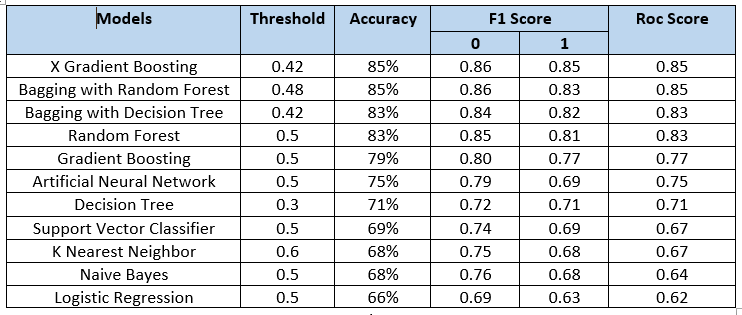

## Conclusion

#### `Random forest `and `bagging with decision tree` both models have an F1 score of 0.83 which means there is a 83% chances that the model is able to distinguish between the positive and negative classes.
#### `XGBoost` model and `bagging with random forest` model have an F1 score of 0.85 which means there is a 85% chances that the model is able to distinguish between the positive and negative classes.
#### Hence out of all the models above, `Bagging with Random Forest` model and `XGBoost` model are classifier is the best model for our classification problem.

### Task 1:-Prepare a complete data analysis report on the given data

● univariat ,bivariat and multvariant analysis is done for the given data.

### Task 2:-Create a predictive model with implementation of different classifiers on liver patient diseases dataset to predict liver diseases

● After data preprocessing the data was tested under different machine learning models
            
● Normal approach and hyperparameter techniques were not giving better accuracy on the given data.
                except `Random Forest` model which gave 83% accuracy without any optimization.
                
● Threshold setting has given the better result above 80% accuracy with very few FP,FN
                 there are 4 models which giving more than 80% of accuracy which are 
                 **Random Forest**, **Bagging with Decision Tree**, **Bagging with Random Forest** and **XGRADIANTBOOSTING**

### Task3:- Create an analysis to show on what basis you have designed your model.

#### ● Main focus was to reduce the number of `False Negatives`  and to increase the number of `False Positives`  in this particular business case.

## Challenges Faced: 
* The dataset has many outliers which are very much far from the normal range, we can't say whether these are possible in the liver disease patient or those data are corrupted.
* However we tried to find more information and handled the outliers with various methods: Z-score, imputaion with median, log transformation, sqrt transformation and IQR.
* The IQR method has given better performance.
* Since the dataset was small, the tree based models are overfitting. 
* The f1 score of the majority class is was lower than that of the minority class. However, we tried to balance the f1 score with threshold manipulation. 
* But still we couldn't achieve best scores, assume that the data could be corrupted and the highly imbalanced dataset has resulted in average performance.
* The correltion between `Total Bilirubin` and `Direct Bilirubin` is not in the range of 0.9-1. But we were able to reach 80% accuracy only when we drop any one column. 
* The model creation was repeated with dataset in another file to reduce the False Negatives and to increase the True Positives. Though we achieved the balance yet it gave accuracy less than 75% even for powerfull models.
